<a href="https://colab.research.google.com/github/ShivaniKale0/Review-Analysis-For-Sensodyne/blob/main/ReviewAnalysisforSensodyne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/488/Major Project
!ls

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1tlV-iAsbuxplGoHLNgXqXKC7E8Ipgfke/Major Project
' '					  Reddit_Posts_Sensodyne
 amazon_cleand.csv			  TeamProject.ipynb
 AmazonReviews_RawData			  TopSellers.csv
'Ideas and Initiatives - BUSI 488.gdoc'   TP_NotTP.json
'Marketing Sensodyne - Busi488.gslides'   TP_NotTPSampleBalanced.pkl
'Marketing Strategies.gdoc'		  Tweets_Sensodyne
 model_TP				  twitter_cleaned
 reddit_cleaned


Importing Libraries

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from lxml import etree
import glob, csv
import pandas as pd
import seaborn as sns

# Data Cleaning and Processing

# Amazon Reviews

In [ ]:
ExtraWhitening_df = pd.read_csv("Extra Whitening Toothpaste 300 review.csv")
FreshBreath_df = pd.read_csv("Fresh Breath Enamel Toothpaste 300 reviews.csv")
GentleWhitening_df = pd.read_csv("Gentle Whitening Enamel Toothpaste 300 reviews.csv")
IntensiveEnamelRepair_df = pd.read_csv("Intensive Enamel Repair Toothpaste 300 reviews.csv")
RepairAndProtectWhitening_df = pd.read_csv("Repair and Protect Whitening Toothpaste 300 reviews.csv")
#ExtraWhitening_df.head()
#FreshBreath_df.head()
#GentleWhitening_df.head()
#IntensiveEnamelRepair_df.head()
RepairAndProtectWhitening_df.head()

country countryCode        date  isVerified  position productAsin  \
0  United States         NaN  2023-03-29        True         1  B07C1ZQ5ZY   
1  United States         NaN  2023-04-18        True         2  B07C1ZQ5ZY   
2  United States         NaN  2023-04-12        True         3  B07C1ZQ5ZY   
3  United States         NaN  2023-04-18        True         4  B07C1ZQ5ZY   
4  United States         NaN  2023-04-17        True         5  B07C1ZQ5ZY   

   ratingScore                                  reviewDescription  \
0            5  After trying more brands of toothpaste for sen...   
1            5  This toothpaste is very good. I have always us...   
2            5  I have been using Sensodyne for over seven yea...   
3            5  This is the best price we could find and it’s ...   
4            5                           No pain from sensitivity   

  reviewImages/0 reviewImages/1               reviewReaction  \
0            NaN            NaN  2 people found this helpful   
1            NaN            NaN                          NaN   
2            NaN            NaN                          NaN   
3            NaN            NaN                          NaN   
4            NaN            NaN                          NaN   

                                         reviewTitle  \
0          Eliminates sensitivity and whitens teeth!   
1                           A recommended toothpaste   
2  Whitens and refreshing good oral Sensodyne pro...   
3                         Better price than anywhere   
4                                  Love this product   

                                           reviewUrl  \
0  https://www.amazon.com/gp/customer-reviews/R1V...   
1  https://www.amazon.com/gp/customer-reviews/R14...   
2  https://www.amazon.com/gp/customer-reviews/RSR...   
3  https://www.amazon.com/gp/customer-reviews/R3J...   
4  https://www.amazon.com/gp/customer-reviews/RMY...   

                                        reviewedIn  \
0  Reviewed in the United States on March 29, 2023   
1  Reviewed in the United States on April 18, 2023   
2  Reviewed in the United States on April 12, 2023   
3  Reviewed in the United States on April 18, 2023   
4  Reviewed in the United States on April 17, 2023   

                                             variant  
0  Flavor Name: WhiteningSize: 3.4 Ounce (Pack of 2)  
1  Flavor Name: WhiteningSize: 3.4 Ounce (Pack of 3)  
2                   Flavor Name: MintSize: 3.4 Ounce  
3  Flavor Name: WhiteningSize: 3.4 Ounce (Pack of 2)  
4  Flavor Name: WhiteningSize: 3.4 Ounce (Pack of 2)

In [ ]:
columns_to_keep = ['date','ratingScore','reviewDescription','reviewTitle','variant','productAsin']

#combine each top seller's review into one data frame
topSellers = pd.concat([ExtraWhitening_df, FreshBreath_df, GentleWhitening_df, IntensiveEnamelRepair_df, RepairAndProtectWhitening_df])

#select column need to be kept
topSellers = topSellers[columns_to_keep]

#map the product asin with their name
mapping_rules = {'B0762LYF5D': 'Extra Whitening',
                 'B01LX217F9': 'Fresh Breath',
                 'B0762LYFKP': 'Gentle Whitening',
                 'B07SG3Y66Y': 'Intensive Whitening',
                 'B07C1ZQ5ZY': 'Repair and Protect Whitening'}

# Replace the values in the 'productAsin' column with its name
topSellers['productAsin'] = topSellers['productAsin'].map(mapping_rules)
topSellers = topSellers.rename(columns={'productAsin': 'productName'})

#change the data type of date to date time
topSellers['date'] = pd.to_datetime(topSellers['date'])

topSellers.head()

date  ratingScore                                  reviewDescription  \
0 2023-04-09            5  Ever since adding this toothpaste to my daily ...   
1 2023-04-08            5  Kind of hard to gush over toothpaste, but AMAZ...   
2 2023-04-16            5                                         Good value   
3 2023-04-08            5  After use this toothpaste i can eat cool food ...   
4 2023-03-28            5  Running out of toothpaste? I ordered more and ...   

           reviewTitle                    variant      productName  
0  My dentist loves me  Size: 4 Ounce (Pack of 3)  Extra Whitening  
1     Does the job ...  Size: 4 Ounce (Pack of 3)  Extra Whitening  
2           Good value  Size: 4 Ounce (Pack of 3)  Extra Whitening  
3               i like  Size: 4 Ounce (Pack of 3)  Extra Whitening  
4       Fast and Good!  Size: 4 Ounce (Pack of 3)  Extra Whitening

In [ ]:
topSellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1500 non-null   datetime64[ns]
 1   ratingScore        1500 non-null   int64         
 2   reviewDescription  1495 non-null   object        
 3   reviewTitle        1500 non-null   object        
 4   variant            1154 non-null   object        
 5   productName        1500 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 82.0+ KB


In [ ]:
 #read some reviews with different rating
#group the data by rating score
grouped = topSellers.groupby('ratingScore')

#print the first 3 rows for each rating score
for score, group in grouped:
    print(f'Reviews with ratingScore = {score}:')
    for name, desc in zip(group['productName'][:10], group['reviewDescription'][:10]):
        print(f'{name}: {desc}')
    print('\n')

Reviews with ratingScore = 1:
Extra Whitening: I wasted my money and now hope I can even return them. Don’t waste your time on trying this particular product. I cant speak for other variants of sensodyne toothpaste, but this particular listing and product literally made my teeth and gums much more sensitive, as well as made my whole bottom row ache for two days. I was hoping this would finally be the solution for my sensitive teeth. I was wrong. I’m not sure if this product is even real. There was no real seal, the bottle seemed cheap and not like the ones given to me by the dentist. There was a “gsk” logo, which also seemed unauthentic. I brushed my teeth with pro health crest toothpaste, which isn’t even made or marketed to make your teeth less sensitive and increase enamel, but after one brush, I noticed a huge difference. I could feel my teeth become healthier. I have peeling on the inside of my lip from using this toothpaste for about a week and I wouldn’t recommend this buy to an

5    1128
4     265
3      82
1      15
2      10
Name: ratingScore, dtype: int64


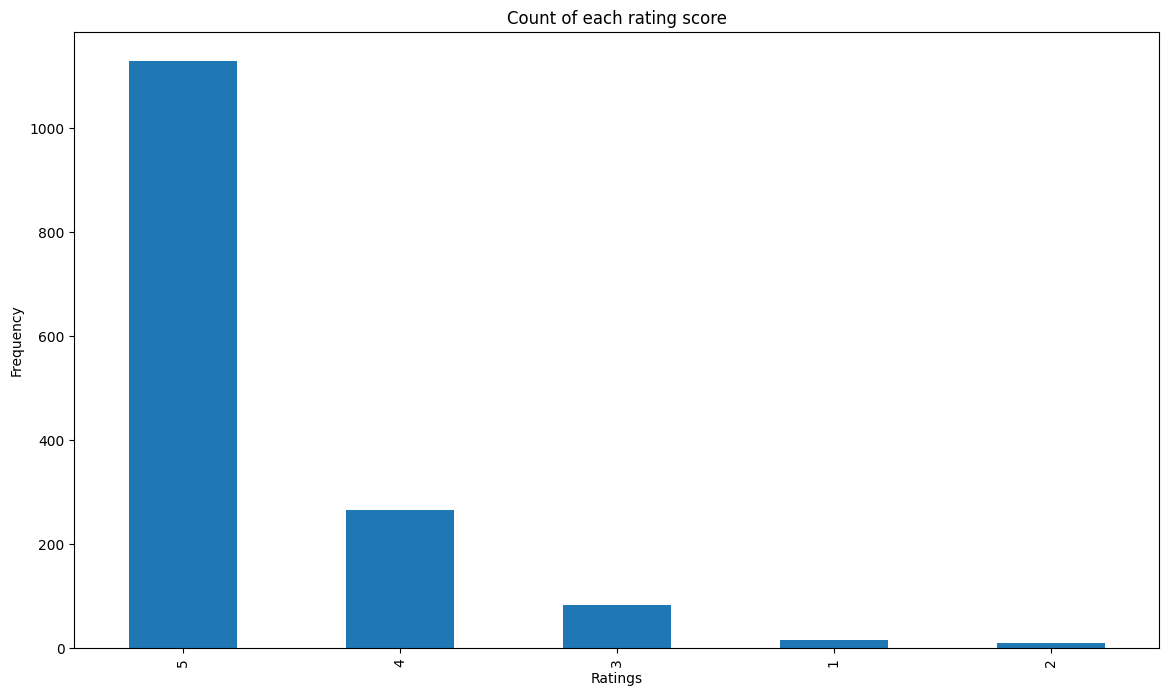

In [ ]:
#Review percent of rating scores

score = topSellers['ratingScore'].value_counts()
print(score)


chart = topSellers['ratingScore'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of each rating score")
chart.set_xlabel("Ratings")
chart.set_ylabel("Frequency")
plt.show()

In [ ]:
#export the data frame to a CSV file
topSellers.to_csv('amazon_cleand.csv', index=False)

# Twitter Posts

In [ ]:
%cd /content/gdrive/MyDrive/488/Major Project/Tweets_Sensodyne
!ls

/content/gdrive/.shortcut-targets-by-id/1tlV-iAsbuxplGoHLNgXqXKC7E8Ipgfke/Major Project/Tweets_Sensodyne
Tweets_Sensodyne_2012-10.json  Tweets_Sensodyne_2017-4.json
Tweets_Sensodyne_2012-11.json  Tweets_Sensodyne_2017-5.json
Tweets_Sensodyne_2012-12.json  Tweets_Sensodyne_2017-6.json
Tweets_Sensodyne_2012-1.json   Tweets_Sensodyne_2017-7.json
Tweets_Sensodyne_2012-2.json   Tweets_Sensodyne_2017-8.json
Tweets_Sensodyne_2012-3.json   Tweets_Sensodyne_2017-9.json
Tweets_Sensodyne_2012-4.json   Tweets_Sensodyne_2018-10.json
Tweets_Sensodyne_2012-5.json   Tweets_Sensodyne_2018-11.json
Tweets_Sensodyne_2012-6.json   Tweets_Sensodyne_2018-12.json
Tweets_Sensodyne_2012-7.json   Tweets_Sensodyne_2018-1.json
Tweets_Sensodyne_2012-8.json   Tweets_Sensodyne_2018-2.json
Tweets_Sensodyne_2012-9.json   Tweets_Sensodyne_2018-3.json
Tweets_Sensodyne_2013-10.json  Tweets_Sensodyne_2018-4.json
Tweets_Sensodyne_2013-11.json  Tweets_Sensodyne_2018-5.json
Tweets_Sensodyne_2013-12.json  Tweets_Sensodyne_2018

In [ ]:

Tweet_Sensodyne = pd.DataFrame()

In [ ]:
dfs = []
for filename in os.listdir():
    # Check if the file is a JSON file and has the right name format
    if filename.endswith('.json'):
        # Read the file into a dataframe
        df = pd.read_json(filename, lines=True)
        dfs.append(df)
Tweet_Sensodyne = pd.concat(dfs, ignore_index=True)

In [ ]:
Tweet_Sensodyne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137059 entries, 0 to 137058
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   _type             137059 non-null  object             
 1   url               137059 non-null  object             
 2   date              137059 non-null  datetime64[ns, UTC]
 3   rawContent        137059 non-null  object             
 4   renderedContent   137059 non-null  object             
 5   id                137059 non-null  int64              
 6   user              137059 non-null  object             
 7   replyCount        137059 non-null  int64              
 8   retweetCount      137059 non-null  int64              
 9   likeCount         137059 non-null  int64              
 10  quoteCount        137059 non-null  int64              
 11  conversationId    137059 non-null  int64              
 12  lang              137059 non-null  object   

In [ ]:
Tweet_Sensodyne.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/BounceDeals_/status/160897...   
1  https://twitter.com/FatKidDeals/status/1608974...   
2  https://twitter.com/Britski_Nic/status/1608945...   
3  https://twitter.com/liliane7hdps/status/160894...   
4  https://twitter.com/Zaynwitter/status/16089407...   

                       date  \
0 2022-12-30 23:54:07+00:00   
1 2022-12-30 23:54:01+00:00   
2 2022-12-30 21:59:47+00:00   
3 2022-12-30 21:53:16+00:00   
4 2022-12-30 21:38:52+00:00   

                                          rawContent  \
0  Amazon Deal Found\n\nSensodyne Pronamel Fresh ...   
1  2pk of Sensodyne Pronamel Fresh Breath- as low...   
2  @dreadfurysong @bourbonislife80 @2A_Patriot_ I...   
3  Sensodyne Pronamel Children Daily Fluoride Too...   
4  @hafseoul Haan yaar sensitivity ka issue hai, ...   

                                     renderedContent                   id  \
0  Amazon Deal Found\n\nSensodyne Pronamel Fresh ...  1608974745130737664   
1  2pk of Sensodyne Pronamel Fresh Breath- as low...  1608974722091417600   
2  @dreadfurysong @bourbonislife80 @2A_Patriot_ I...  1608945972507463680   
3  Sensodyne Pronamel Children Daily Fluoride Too...  1608944333671264258   
4  @hafseoul Haan yaar sensitivity ka issue hai, ...  1608940709473832961   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2  {'_type': 'snscrape.modules.twitter.User', 'us...           1   
3  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
4  {'_type': 'snscrape.modules.twitter.User', 'us...           0   

   retweetCount  likeCount  ...  inReplyToTweetId  \
0             0          0  ...               NaN   
1             0          1  ...               NaN   
2             0          2  ...      1.608924e+18   
3             0          0  ...               NaN   
4             0          1  ...      1.608940e+18   

                                       inReplyToUser  \
0                                               None   
1                                               None   
2  {'_type': 'snscrape.modules.twitter.User', 'us...   
3                                               None   
4  {'_type': 'snscrape.modules.twitter.User', 'us...   

                                      mentionedUsers coordinates place  \
0                                               None        None  None   
1                                               None        None  None   
2  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   
3                                               None        None  None   
4  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   

                hashtags cashtags  \
0  [deals, amazon, free]     None   
1                   None     None   
2                   None     None   
3                   None     None   
4                   None     None   

                                                card  viewCount vibe  
0  {'_type': 'snscrape.modules.twitter.SummaryCar...       11.0  NaN  
1                                               None    16009.0  NaN  
2                                               None       21.0  NaN  
3                                               None        8.0  NaN  
4                                               None       10.0  NaN  

[5 rows x 30 columns]

In [ ]:
#install tweet pre-processor
!pip3 install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Tweet_Sensodyne.columns

Index(['_type', 'url', 'date', 'rawContent', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'links',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card', 'viewCount', 'vibe'],
      dtype='object')

In [ ]:
tweets = Tweet_Sensodyne.filter(['id','renderedContent','date'], axis=1)
tweets.rename(columns={'renderedContent':'Tweet'}, inplace=True)
tweets.head()

id                                              Tweet  \
0  1608974745130737664  Amazon Deal Found\n\nSensodyne Pronamel Fresh ...   
1  1608974722091417600  2pk of Sensodyne Pronamel Fresh Breath- as low...   
2  1608945972507463680  @dreadfurysong @bourbonislife80 @2A_Patriot_ I...   
3  1608944333671264258  Sensodyne Pronamel Children Daily Fluoride Too...   
4  1608940709473832961  @hafseoul Haan yaar sensitivity ka issue hai, ...   

                       date  
0 2022-12-30 23:54:07+00:00  
1 2022-12-30 23:54:01+00:00  
2 2022-12-30 21:59:47+00:00  
3 2022-12-30 21:53:16+00:00  
4 2022-12-30 21:38:52+00:00

In [ ]:
# 2. Preprocess the tweets

# a. Import the preprocessor
import preprocessor as prepro

# b. Set options to remove URL, Reserved word
prepro.set_options(prepro.OPT.URL, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.HASHTAG)

# c. Let's do it for all tweets
tweets['text']  = tweets['Tweet'].apply(prepro.clean)

# d. Check our work
tweets['text'].head(10)

0    Amazon Deal Found Sensodyne Pronamel Fresh Bre...
1    2pk of Sensodyne Pronamel Fresh Breath- as low...
2                         I have to use Sensodyne now.
3    Sensodyne Pronamel Children Daily Fluoride Too...
4    Haan yaar sensitivity ka issue hai, doctor rec...
5       What about for sensitive teeth I use sensodyne
6                          I hate sensodyne toothpaste
7    I’m secretly a Sensodyne man, very sophisticated.
8    Pharmaprix is selling the regular size (read: ...
9    Sensodyne Pronamel Gentle Whitening Toothpaste...
Name: text, dtype: object

In [ ]:
# 3. Fix some things the preprocessor missed
htmlents = r'|'.join((r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;'))
tweets.text = tweets.text.replace(
    {htmlents:'',       # remove html punctuation codes
     '#|@':'',          # remove hashtag # and reference @, leaving tags (unless preprocessor removed already)
     '&amp;':' and ',   # &amp; to and
     '\n|\t':' '}, regex=True) # strip HTMLentries, hash tag markers, reference @, newlines
tweets.text = tweets.text.str.strip().replace({' +':' '},regex=True) # collapse extra spaces
# Check our Work
tweets.text.head(10)

0    Amazon Deal Found Sensodyne Pronamel Fresh Bre...
1    2pk of Sensodyne Pronamel Fresh Breath- as low...
2                         I have to use Sensodyne now.
3    Sensodyne Pronamel Children Daily Fluoride Too...
4    Haan yaar sensitivity ka issue hai, doctor rec...
5       What about for sensitive teeth I use sensodyne
6                          I hate sensodyne toothpaste
7    I’m secretly a Sensodyne man, very sophisticated.
8    Pharmaprix is selling the regular size (read: ...
9    Sensodyne Pronamel Gentle Whitening Toothpaste...
Name: text, dtype: object

In [ ]:
# 4. Remove duplicate tweets and reindex

print(tweets.shape)
tweets.drop_duplicates(subset='text', keep="first", inplace=True)
tweets.drop_duplicates(subset='id', keep="first", inplace=True)
tweets.reset_index(drop=True, inplace=True)
print(tweets.shape)

(137059, 4)
(102560, 4)


In [ ]:
tweets.head()

id                                              Tweet  \
0  1608974745130737664  Amazon Deal Found\n\nSensodyne Pronamel Fresh ...   
1  1608974722091417600  2pk of Sensodyne Pronamel Fresh Breath- as low...   
2  1608945972507463680  @dreadfurysong @bourbonislife80 @2A_Patriot_ I...   
3  1608944333671264258  Sensodyne Pronamel Children Daily Fluoride Too...   
4  1608940709473832961  @hafseoul Haan yaar sensitivity ka issue hai, ...   

                       date                                               text  
0 2022-12-30 23:54:07+00:00  Amazon Deal Found Sensodyne Pronamel Fresh Bre...  
1 2022-12-30 23:54:01+00:00  2pk of Sensodyne Pronamel Fresh Breath- as low...  
2 2022-12-30 21:59:47+00:00                       I have to use Sensodyne now.  
3 2022-12-30 21:53:16+00:00  Sensodyne Pronamel Children Daily Fluoride Too...  
4 2022-12-30 21:38:52+00:00  Haan yaar sensitivity ka issue hai, doctor rec...

In [ ]:
!pip3 install -U emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=025770957ac184fc9717d7d355c21e75a9cf66743526b7658745eec045d2aa5d
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
#Convert emojis to text
tweets['emojis'] = tweets['text'].apply(lambda txt: emoji.distinct_emoji_list(txt)) # this will get you the unique emojis

# Check if it worked
display(tweets.iloc[0:5])

id                                              Tweet  \
0  1608974745130737664  Amazon Deal Found\n\nSensodyne Pronamel Fresh ...   
1  1608974722091417600  2pk of Sensodyne Pronamel Fresh Breath- as low...   
2  1608945972507463680  @dreadfurysong @bourbonislife80 @2A_Patriot_ I...   
3  1608944333671264258  Sensodyne Pronamel Children Daily Fluoride Too...   
4  1608940709473832961  @hafseoul Haan yaar sensitivity ka issue hai, ...   

                       date  \
0 2022-12-30 23:54:07+00:00   
1 2022-12-30 23:54:01+00:00   
2 2022-12-30 21:59:47+00:00   
3 2022-12-30 21:53:16+00:00   
4 2022-12-30 21:38:52+00:00   

                                                text emojis  
0  Amazon Deal Found Sensodyne Pronamel Fresh Bre...     []  
1  2pk of Sensodyne Pronamel Fresh Breath- as low...     []  
2                       I have to use Sensodyne now.     []  
3  Sensodyne Pronamel Children Daily Fluoride Too...     []  
4  Haan yaar sensitivity ka issue hai, doctor rec...    [😬]

In [ ]:
# Replace Emojis in Tweets with text and save to a new column
tweets['text_converted'] = tweets['text'].apply(lambda txt: emoji.demojize(txt, delimiters=("", " ")))

# Check if it worked
display(tweets.iloc[0:5]) # logical indexing: from tweets get rows 0 to 5 and columns 1 and 5

id                                              Tweet  \
0  1608974745130737664  Amazon Deal Found\n\nSensodyne Pronamel Fresh ...   
1  1608974722091417600  2pk of Sensodyne Pronamel Fresh Breath- as low...   
2  1608945972507463680  @dreadfurysong @bourbonislife80 @2A_Patriot_ I...   
3  1608944333671264258  Sensodyne Pronamel Children Daily Fluoride Too...   
4  1608940709473832961  @hafseoul Haan yaar sensitivity ka issue hai, ...   

                       date  \
0 2022-12-30 23:54:07+00:00   
1 2022-12-30 23:54:01+00:00   
2 2022-12-30 21:59:47+00:00   
3 2022-12-30 21:53:16+00:00   
4 2022-12-30 21:38:52+00:00   

                                                text emojis  \
0  Amazon Deal Found Sensodyne Pronamel Fresh Bre...     []   
1  2pk of Sensodyne Pronamel Fresh Breath- as low...     []   
2                       I have to use Sensodyne now.     []   
3  Sensodyne Pronamel Children Daily Fluoride Too...     []   
4  Haan yaar sensitivity ka issue hai, doctor rec...    [😬]   

                                      text_converted  
0  Amazon Deal Found Sensodyne Pronamel Fresh Bre...  
1  2pk of Sensodyne Pronamel Fresh Breath- as low...  
2                       I have to use Sensodyne now.  
3  Sensodyne Pronamel Children Daily Fluoride Too...  
4  Haan yaar sensitivity ka issue hai, doctor rec...

# Reddit Post

In [ ]:
%cd /content/gdrive/MyDrive/488/Major Project/Reddit_Posts_Sensodyne
!ls

/content/gdrive/.shortcut-targets-by-id/1tlV-iAsbuxplGoHLNgXqXKC7E8Ipgfke/Major Project/Reddit_Posts_Sensodyne
Reddit_Posts_Sensodyne__2012-10.json  Reddit_Posts_Sensodyne__2017-4.json
Reddit_Posts_Sensodyne__2012-11.json  Reddit_Posts_Sensodyne__2017-5.json
Reddit_Posts_Sensodyne__2012-12.json  Reddit_Posts_Sensodyne__2017-6.json
Reddit_Posts_Sensodyne__2012-1.json   Reddit_Posts_Sensodyne__2017-7.json
Reddit_Posts_Sensodyne__2012-2.json   Reddit_Posts_Sensodyne__2017-8.json
Reddit_Posts_Sensodyne__2012-3.json   Reddit_Posts_Sensodyne__2017-9.json
Reddit_Posts_Sensodyne__2012-4.json   Reddit_Posts_Sensodyne__2018-10.json
Reddit_Posts_Sensodyne__2012-5.json   Reddit_Posts_Sensodyne__2018-11.json
Reddit_Posts_Sensodyne__2012-6.json   Reddit_Posts_Sensodyne__2018-12.json
Reddit_Posts_Sensodyne__2012-7.json   Reddit_Posts_Sensodyne__2018-1.json
Reddit_Posts_Sensodyne__2012-8.json   Reddit_Posts_Sensodyne__2018-2.json
Reddit_Posts_Sensodyne__2012-9.json   Reddit_Posts_Sensodyne__2018-3.jso

In [ ]:
Reddit_Sensodyne = pd.DataFrame()

dfs_reddit = []
for filename in os.listdir():
    # Check if the file is a JSON file and has the right name format
    if filename.endswith('.json'):
        # Read the file into a dataframe
        df_reddit = pd.read_json(filename, lines=True)
        dfs_reddit.append(df_reddit)
Reddit_Sensodyne = pd.concat(dfs_reddit, ignore_index=True)

In [ ]:
Reddit_Sensodyne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   _type      23111 non-null  object             
 1   author     23111 non-null  object             
 2   body       22939 non-null  object             
 3   date       23111 non-null  datetime64[ns, UTC]
 4   id         23111 non-null  object             
 5   parentId   13053 non-null  float64            
 6   subreddit  23111 non-null  object             
 7   url        23111 non-null  object             
 8   link       94 non-null     object             
 9   selftext   77 non-null     object             
 10  title      172 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
memory usage: 1.9+ MB


In [ ]:
Reddit_Sensodyne.head()

_type              author  \
0     snscrape.modules.reddit.Comment  Legitimate-Machine   
1     snscrape.modules.reddit.Comment        Doc_Umbrella   
2     snscrape.modules.reddit.Comment        SpaceWhale88   
3     snscrape.modules.reddit.Comment     Dantesfireplace   
4  snscrape.modules.reddit.Submission            Calliaa1   

                                                body  \
0  I would definitely describe it as sensitivity ...   
1  What about sensodyne? They’re owned by a Japan...   
2  I'm a dental hygienist. Former bulimic. Go buy...   
3  I don’t work for Sensodyne, I promise, but sin...   
4                                                NaN   

                       date          id      parentId     subreddit  \
0 2023-01-01 03:04:23+00:00  t1_j2gl26t  4.150764e+10    Invisalign   
1 2023-01-01 02:07:28+00:00  t1_j2ge9dd  4.150556e+10  2meirl4meirl   
2 2022-12-31 22:07:18+00:00  t1_j2fiph4           NaN   EDAnonymous   
3 2022-12-31 08:47:05+00:00  t1_j2cxg8y  4.149981e+10     AskReddit   
4 2022-12-31 07:20:26+00:00   t3_zzoceo           NaN          3oft   

                                                 url  \
0  https://old.reddit.com/r/Invisalign/comments/z...   
1  https://old.reddit.com/r/2meirl4meirl/comments...   
2  https://old.reddit.com/r/EDAnonymous/comments/...   
3  https://old.reddit.com/r/AskReddit/comments/zz...   
4  https://old.reddit.com/r/3oft/comments/zzoceo/...   

                         link selftext  \
0                         NaN      NaN   
1                         NaN      NaN   
2                         NaN      NaN   
3                         NaN      NaN   
4  https://askreddi.com/8209/     None   

                                               title  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Pinjra Episode 12 - Presented by Sensodyne - 1...

In [ ]:
reddit = Reddit_Sensodyne.filter(['author','body','date','subreddit'], axis=1)
reddit.rename(columns={'body':'Post'}, inplace=True)
reddit.head()

author                                               Post  \
0  Legitimate-Machine  I would definitely describe it as sensitivity ...   
1        Doc_Umbrella  What about sensodyne? They’re owned by a Japan...   
2        SpaceWhale88  I'm a dental hygienist. Former bulimic. Go buy...   
3     Dantesfireplace  I don’t work for Sensodyne, I promise, but sin...   
4            Calliaa1                                                NaN   

                       date     subreddit  
0 2023-01-01 03:04:23+00:00    Invisalign  
1 2023-01-01 02:07:28+00:00  2meirl4meirl  
2 2022-12-31 22:07:18+00:00   EDAnonymous  
3 2022-12-31 08:47:05+00:00     AskReddit  
4 2022-12-31 07:20:26+00:00          3oft

In [ ]:
# Fix some text issue
htmlents_reddit = r'|'.join((r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;'))
reddit.Post = reddit.Post.replace(
    {htmlents_reddit:'',       # remove html punctuation codes
     '#|@':'',          # remove hashtag # and reference @, leaving tags (unless preprocessor removed already)
     '&amp;':' and ',   # &amp; to and
     '\n|\t':' ',
     '\:\)':'smile face',
     '\:\(':'sad face'}, regex=True) # strip HTMLentries, hash tag markers, reference @, newlines

reddit.Post = reddit.Post.str.strip().replace({' +':' '},regex=True) # collapse extra spaces
# Check our Work
reddit.Post.head(10)

0    I would definitely describe it as sensitivity ...
1    What about sensodyne? They’re owned by a Japan...
2    I'm a dental hygienist. Former bulimic. Go buy...
3    I don’t work for Sensodyne, I promise, but sin...
4                                                  NaN
5    Yeah I was able to avoid getting the 2 root ca...
6                                    Sensodyne laga le
7    Weeeellllll, I am by no means saying your wron...
8    Sensodyne in the fresh mint flavor. The ingred...
9    I’m a dentist in London. There is nothing wron...
Name: Post, dtype: object

In [ ]:
# Remove duplicates
print(reddit.shape)
reddit.drop_duplicates(subset='Post', keep="first", inplace=True)
#reddit.drop_duplicates(subset='author', keep="first", inplace=True)
reddit.reset_index(drop=True, inplace=True)
print(reddit.shape)

(23111, 4)
(22451, 4)


In [ ]:
# see if emoji exist in reddit posts
for post in range(30):
  print(reddit.Post[post])

I would definitely describe it as sensitivity now, rather than pain or soreness, though it occasionally radiates toward the root. I bought some Sensodyne and have been rubbing it into the tooth. It hasn’t gotten worse but hasn’t gotten better. Found some old threads where others described this same sensation so that was reassuring.
What about sensodyne? They’re owned by a Japanese company and thats all I use
I'm a dental hygienist. Former bulimic. Go buy some therabreath rinse. Swish really well and gargle after purging. Wait 30mins before you brush. Floss daily. Get a prescription toothpaste for nighttime and sensodyne pronamel for mornings. Don't sip on anything but water during the day. Drink your coffee in a reasonable amount of time, like 20 mins. Diet soda is really acidic, so keep it to meals or short exposure times.
I don’t work for Sensodyne, I promise, but since I switched to their toothpaste, my temperature sensitivity has disappeared. When I stay in hotels and use my travel

In [ ]:
#!pip3 install -U emoji
import emoji

In [ ]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22451 entries, 0 to 22450
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   author     22451 non-null  object             
 1   Post       22450 non-null  object             
 2   date       22451 non-null  datetime64[ns, UTC]
 3   subreddit  22451 non-null  object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 701.7+ KB


In [ ]:
#Convert emojis to text
reddit['emojis'] = reddit['Post'].apply(lambda txt:
                                         '' if pd.isnull(txt)
                                         else ' '.join(emoji.distinct_emoji_list(str(txt))))

# Check if it worked
display(reddit.iloc[35:40])

author                                               Post  \
35          omgblvd  You might be sensitive to the SLS (sodium laur...   
36        stewie_91  Eu am tot de la OralB cam vrche dar e super, m...   
37          april8r  Do you use sensodyne? Might help with your nex...   
38     JaponiNashta  Oh we use that to make deliveries. Sent you so...   
39  restroom_raider  I put sensodyne on my chicken then dunk that i...   

                        date      subreddit emojis  
35 2022-12-29 15:55:56+00:00   CleaningTips         
36 2022-12-29 15:42:06+00:00       CasualRO         
37 2022-12-29 10:21:45+00:00  unitedkingdom      😂  
38 2022-12-29 09:36:26+00:00        Cricket         
39 2022-12-29 09:36:17+00:00        Cricket

In [ ]:
# Replace Emojis in post with text and save to a new column
reddit['post_converted'] = reddit['Post'].apply(lambda txt: emoji.demojize(str(txt), delimiters=("", " ")))


# Check if it worked
display(reddit.iloc[35:40])

author                                               Post  \
35          omgblvd  You might be sensitive to the SLS (sodium laur...   
36        stewie_91  Eu am tot de la OralB cam vrche dar e super, m...   
37          april8r  Do you use sensodyne? Might help with your nex...   
38     JaponiNashta  Oh we use that to make deliveries. Sent you so...   
39  restroom_raider  I put sensodyne on my chicken then dunk that i...   

                        date      subreddit emojis  \
35 2022-12-29 15:55:56+00:00   CleaningTips          
36 2022-12-29 15:42:06+00:00       CasualRO          
37 2022-12-29 10:21:45+00:00  unitedkingdom      😂   
38 2022-12-29 09:36:26+00:00        Cricket          
39 2022-12-29 09:36:17+00:00        Cricket          

                                       post_converted  
35  You might be sensitive to the SLS (sodium laur...  
36  Eu am tot de la OralB cam vrche dar e super, m...  
37  Do you use sensodyne? Might help with your nex...  
38  Oh we use that to make deliveries. Sent you so...  
39  I put sensodyne on my chicken then dunk that i...

In [ ]:
#check if emojis are successfully converted
reddit.post_converted[37]

'Do you use sensodyne? Might help with your next nerds binge. face_with_tears_of_joy '

In [ ]:
reddit_post = reddit['post_converted']
print(reddit_post)

0        I would definitely describe it as sensitivity ...
1        What about sensodyne? They’re owned by a Japan...
2        I'm a dental hygienist. Former bulimic. Go buy...
3        I don’t work for Sensodyne, I promise, but sin...
4                                                      nan
                               ...                        
22446    Do you tend to run on cold days, like say in J...
22447    I've been looking into Novamin toothpastes and...
22448    They recommended sensodyne to me "iso-active" ...
22449    My mom is a super cautious lady who likes to f...
22450    I actually felt my teeth scream out in pain fr...
Name: post_converted, Length: 22451, dtype: object


In [ ]:
# Since there are some extremely long post, I will need to split it into parts with 75 words.

import math

# define a function to help split text into chunks
def split_text(text, n):
    words = str(text).split()
    chunks = [words[i:i+n] for i in range(0, len(words), n)]
    return chunks

# set the number of words per chunk
n = 100

# create a new list to store the split posts
reddit_split = []

# iterate over the text in the post_converted column and split it into chunks
for post in reddit['post_converted']:
    chunks = split_text(post, n)
    for chunk in chunks:
        reddit_split.append(' '.join(chunk))

In [ ]:
for i in range(10):
  print(reddit_split[i])

I would definitely describe it as sensitivity now, rather than pain or soreness, though it occasionally radiates toward the root. I bought some Sensodyne and have been rubbing it into the tooth. It hasn’t gotten worse but hasn’t gotten better. Found some old threads where others described this same sensation so that was reassuring.
What about sensodyne? They’re owned by a Japanese company and thats all I use
I'm a dental hygienist. Former bulimic. Go buy some therabreath rinse. Swish really well and gargle after purging. Wait 30mins before you brush. Floss daily. Get a prescription toothpaste for nighttime and sensodyne pronamel for mornings. Don't sip on anything but water during the day. Drink your coffee in a reasonable amount of time, like 20 mins. Diet soda is really acidic, so keep it to meals or short exposure times.
I don’t work for Sensodyne, I promise, but since I switched to their toothpaste, my temperature sensitivity has disappeared. When I stay in hotels and use my travel

# Create models to filter all posts about toothpaste

# Classification Models

In [ ]:
%cd /content/gdrive/MyDrive/488/Major Project
!ls

/content/gdrive/.shortcut-targets-by-id/1tlV-iAsbuxplGoHLNgXqXKC7E8Ipgfke/Major Project
' '					  Reddit_Posts_Sensodyne
 amazon_cleand.csv			  TeamProject.ipynb
 AmazonReviews_RawData			  TopSellers.csv
'Ideas and Initiatives - BUSI 488.gdoc'   TP_NotTP.json
'Marketing Sensodyne - Busi488.gslides'   TP_NotTPSampleBalanced.pkl
'Marketing Strategies.gdoc'		  Tweets_Sensodyne
 model_TP				  twitter_cleaned
 reddit_cleaned


In [ ]:
tp = pd.read_json('TP_NotTP.json', orient ='split', compression = 'infer')
tp.head(5)

sentence  \
0                             After 10 uses I began to feel gum pain/burning sensation.   
1    I wanted a whitening toothpaste bc i do drink coffee and have the occasional wine.   
2                Iâve noticed my teeth has gotten whiter depending on the toothbrush.   
3  At this stage of life, my teeth are strong, and the toothpaste does keep them white.   
4       I have sensitive gums and had been given an ultra soft colgate from my dentist.   

   label  
0      1  
1      1  
2      0  
3      1  
4      1

In [ ]:
# Get the positive and negative sentences from dataframe
pos_sen = list(tp[tp['label'] == 1]['sentence'])
neg_sen = list(tp[tp['label'] == 0]['sentence'])

tp.label.value_counts()

1    1317
0     898
Name: label, dtype: int64

In [ ]:
import random
# 2. Get the minimum count for a balanced sample
min_cnt = min(len(pos_sen), len(neg_sen))

# 3. There are more sentences belonging to class 1.
# We will randomly sample equal number of sentences from class 1.
# Sentences will be our feature variable (the one predictions are based on)
random.seed(0)
sentences =  random.sample(neg_sen, min_cnt) + random.sample(pos_sen, min_cnt)

# 4. Prepare the labels for classification
# Labels will be our response variable (what we are trying to predict)
labels = [0] * min_cnt + [1] * min_cnt

# 5. Double check that we have the same number of sentencs and labels
len(sentences), len(labels)

(1796, 1796)

In [ ]:
# 6. Save Balanced Toothpaste/Not toothpaste Sample
df=pd.DataFrame(
    {'sentences': sentences,
     'labels': labels})

df.to_pickle('TP_NotTPSampleBalanced.pkl')

In [ ]:
# 1. We will need to install huggingface transformers first
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 2. Load other required models
from tqdm import tqdm
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1. For BERT:
model_name = 'bert-base-cased'

# 2. Import tokenizer and model imports from huggingface
from transformers import AutoTokenizer, AutoModel

# 3. Load pretrained tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
# 1. Load the data
tp_balanced=pd.read_pickle("TP_NotTPSampleBalanced.pkl")
tp_balanced.head()

sentences  \
0                                                         The medium bristles are ok, but softer would irritate gums less; however, they do clean your teeth thoroughly.   
1                                                                                                                 Nice tooth brush with soft bristles for sensitive gums   
2                                                                                                         This is one of the best mouthwashes to use to get white teeth.   
3  Much softer and more comfortable against my gumline, much less irritation, and a faster clean that actually seems *better* than the electric toothbrushes I've tried.   
4                                   I do not have gum issues or Tender gums and this fried my lower gums even with how meticulously careful I was putting it on my teeth   

   labels  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
# 2. Extract Sentences (Xs) and Labels (ys)
sentences=tp_balanced.sentences.to_list()
labels=tp_balanced.labels.to_list()

In [ ]:
# 3. Load train_test_split from sklearn and split the Sample into training and testing data
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences,labels,test_size=0.2, stratify=labels, random_state=42)
print(f'Training Sample contains {len(train_sentences)} sentences\nTesting Sample contains {len(test_sentences)} sentences.')

Training Sample contains 1436 sentences
Testing Sample contains 360 sentences.


In [ ]:
# 1. Set the maximum length value
padding_type = 'max_length'

# 2. Restrict to maximum length 75 to save RAM memory
max_length = 75

In [ ]:
# 3. Function to tokenize the sentences and return tokens and padding
def tokenize_sentences(sent):
  input_ids = []
  attention_mask = []
  token_ids = []

  for i in tqdm(range(len(sent))):
    sentence = sent[i]
    encoded = tokenizer.encode_plus(text=sentence,
                                    add_special_tokens=True,
                                    padding=padding_type,
                                    max_length=max_length,
                                    truncation=True,
                                    return_token_type_ids=True,
                                    return_tensors='pt')

    input_ids.append(encoded['input_ids'])
    attention_mask.append(encoded['attention_mask'])

  input_ids = torch.cat(input_ids, dim=0, out=None)
  attention_mask = torch.cat(attention_mask, dim=0, out=None)

  return input_ids, attention_mask

In [ ]:
# 4. Convert training data
train_input_ids, train_attention_mask = tokenize_sentences(train_sentences)
test_input_ids, test_attention_mask = tokenize_sentences(test_sentences)

100%|██████████| 360/360 [00:00<00:00, 4573.62it/s]


In [ ]:
#Turn label into sensor

# 1. Convert labels to tensor (PyTorch's array) for training
train_labels = torch.LongTensor(train_labels)
test_labels = torch.LongTensor(test_labels)

In [ ]:
# 2. Let's see the shape of our inputs
print(f"Tokenized inputs shape: {tuple(train_input_ids.size())}")
print(f"Attention mask shape: {tuple(train_input_ids.size())}")

Tokenized inputs shape: (1436, 75)
Attention mask shape: (1436, 75)


In [ ]:
# Create data loader

# 1. Class to retrieve batches efficiently for GPU computation

class TaskDataset(torch.utils.data.Dataset):
  def __init__(self, inputids, attnmasks, labels):
    self.inputids = inputids
    self.attnmasks = attnmasks
    self.labels = labels

  def __getitem__(self, idx):
    item = {}
    item['input_ids'] = self.inputids[idx]
    item['attention_mask'] = self.attnmasks[idx]
    item['labels'] = self.labels[idx]
    return item

  def __len__(self):
    return len(self.labels)

In [ ]:
# 2. Convert training data into data loader object
train_loader = TaskDataset(train_input_ids, train_attention_mask, train_labels)

# 3. Convert test data into data loader object
test_loader = TaskDataset(test_input_ids, test_attention_mask, test_labels)

In [ ]:
# Model evaluate metrics

# 0. Import libraries
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from scipy.special import softmax

# 1. Function to compute precision, recall, f1 and accuracy
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    pred_scores = softmax(pred.predictions, 1)
    pred_scores = np.max(pred_scores, 1)
    if(numclasses > 2):
        avg = 'macro'
    else:
        avg = 'binary'
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=avg)
    acc = accuracy_score(labels, preds) * 100
    return {
        'accuracy': acc,
        'f1': f1 * 100,
        'precision': precision,
        'recall': recall,
        'pred_scores': pred_scores,
        'pred_indices': preds
    }

In [ ]:
# Instantiate classification model

# 1. Import methods from hugging face
from transformers import AutoModelForSequenceClassification

# 2. Let's first define the number of classes in our dataset: in classifcation we have 2 classes (0 and 1)
numclasses = 2

# 3. Instantiate the model
model = AutoModelForSequenceClassification.from_pretrained(
		model_name,
		output_hidden_states=False,
		output_attentions=False,
		num_labels=numclasses
		)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
# Set training parameters

# 1. Hyper-parameters for our model
numepochs = 5

# 2. Mention large number to avoid saving models (They are huge!)
logging_steps = 10000000
save_steps = 1000000

In [ ]:
# 3. Import TrainingArguments from huggingface
from transformers import TrainingArguments

# 4. per_device_train_batch_size is the batch size we use during training.
# If you are facing RAM issues in the colab, change this value to 8 or 16.
training_args = TrainingArguments(
		output_dir=' ',
		num_train_epochs=numepochs,
		warmup_steps=1000,
		weight_decay=0.01,
    per_device_train_batch_size=32, # Change this value if you have RAM issue in colab
		logging_dir=' ',
		logging_steps=logging_steps,
		save_steps=save_steps
		)

In [ ]:
%%time
# 1. Import trainer from huggingface
from transformers import Trainer

# 2. Load the trainer class from huggingface
trainer = Trainer(
		model=model,
		args=training_args,
		train_dataset=train_loader,
		eval_dataset=test_loader,
		compute_metrics=compute_metrics
		)

# 3. Fine-Tune the Model
trainer.train()

CPU times: user 1min 12s, sys: 1.79 s, total: 1min 14s
Wall time: 1min 28s


TrainOutput(global_step=225, training_loss=0.5160428873697916, metrics={'train_runtime': 85.0538, 'train_samples_per_second': 84.417, 'train_steps_per_second': 2.645, 'total_flos': 276729108030000.0, 'train_loss': 0.5160428873697916, 'epoch': 5.0})

In [ ]:
# Save the model
output_dir = 'model_TP/'
trainer.save_model(output_dir)

In [ ]:
import numpy as np
# Evaluate the model on the testing data
# 1. Evaluates the model on test data
testscores = trainer.evaluate()

Trainer is attempting to log a value of "[0.61005425 0.7101674  0.9453055  0.96867675 0.99223125 0.9716058
 0.9871389  0.9777982  0.9615868  0.56434166 0.88940024 0.99154305
 0.99293    0.97545344 0.97049874 0.70762414 0.6893607  0.97126925
 0.9744693  0.96999466 0.9591962  0.991674   0.9769205  0.9772444
 0.6244479  0.99171025 0.9801814  0.99193054 0.98323375 0.9909745
 0.9908172  0.9789585  0.9864979  0.6005921  0.9913155  0.97355837
 0.9874972  0.9768188  0.7362144  0.98773545 0.9885278  0.89221376
 0.6995691  0.95592606 0.939872   0.5490462  0.9814201  0.9913782
 0.95678383 0.9564198  0.9784153  0.9694717  0.9659158  0.97265935
 0.9774541  0.97374547 0.99067265 0.9768548  0.91694677 0.99053043
 0.991514   0.54973227 0.87279373 0.7700585  0.96086204 0.53875625
 0.8140921  0.92733544 0.9719078  0.9900535  0.95481396 0.9677394
 0.87893057 0.7129291  0.96453255 0.9293047  0.99128014 0.8469441
 0.9811426  0.9418112  0.9906218  0.9898247  0.99126315 0.6702933
 0.967109   0.9876304  0.974

In [ ]:
# 2. Print accuracy score and f1 score
print(f"Test Accuracy {testscores['eval_accuracy']:.2f}")
print(f"Test F1 Score {testscores['eval_f1']:.2f}")

Test Accuracy 91.11
Test F1 Score 90.96


In [ ]:
# Check the classification report

# 1. Get the predictions from trainer
test_pred_labels = testscores['eval_pred_indices']
test_pred_scores = testscores['eval_pred_scores']

In [ ]:
# 2. Import required package
from sklearn.metrics import classification_report

# 3. Output Classifcation Report
print(classification_report(test_labels, test_pred_labels))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       180
           1       0.93      0.89      0.91       180

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360



Text(0.5, 21.249999999999993, 'Predicted')

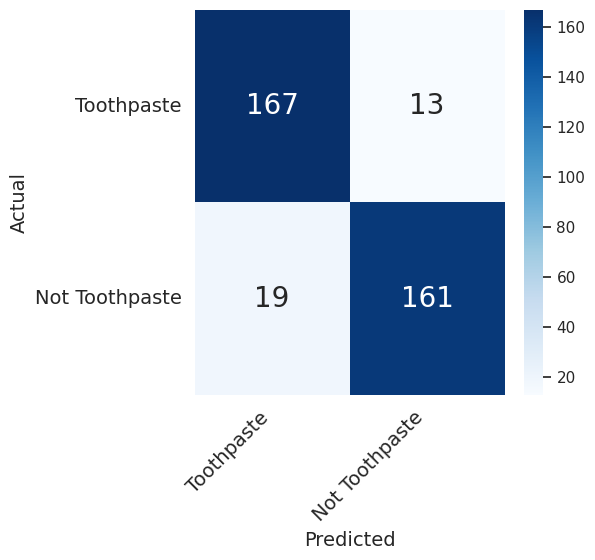

In [ ]:
# Check the confusion matrix

# 1. Load required packages
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 2. Plot the confusion matrix
con_matrix = confusion_matrix(test_labels, test_pred_labels)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Toothpaste', 'Not Toothpaste'), ('Toothpaste', 'Not Toothpaste'))

# 3. Visualize
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
bottom, top = heatmap.get_ylim()
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Use the model to classify twitter data

In [ ]:
New_Sentences_tweet = tweets.text_converted
New_Sentences_tweet

0         Amazon Deal Found Sensodyne Pronamel Fresh Bre...
1         2pk of Sensodyne Pronamel Fresh Breath- as low...
2                              I have to use Sensodyne now.
3         Sensodyne Pronamel Children Daily Fluoride Too...
4         Haan yaar sensitivity ka issue hai, doctor rec...
                                ...                        
102555         $2.00/2 Sensodyne products Printable Coupons
102556    $2.00 OFF any TWO (2) Sensodyneregistered  pro...
102557    So apparently my suddenly sensitive tooth is d...
102558    Couponing 4 You: $2 OFF ANY 2 SENSODYNE PRODUCTS!
102559    Tory's This and That: $2.00 OFF any TWO Sensod...
Name: text_converted, Length: 102560, dtype: object

In [ ]:
# Load fine tune BERT model

# 1. Change the path where you saved the trained model.
output_dir = 'model_TP/'

# 2. Import tokenizer and model imports from huggingface
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 3. Note. If you have different model (eg: BERT) during training change the appropriate name here.
model_name = 'bert-base-cased'

# 4. Load pretrained tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 5. Let's first set the number of classes in our dataset
numclasses = 2

# 6. Instatiate the model
model = AutoModelForSequenceClassification.from_pretrained(
		output_dir,
		output_hidden_states=False,
		output_attentions=False,
		num_labels=numclasses
		)

In [ ]:
# new max length
max_length_new = 100

In [ ]:
# Prepare New Sentences
test_input_ids, test_attention_mask = tokenize_sentences(New_Sentences_tweet)

100%|██████████| 102560/102560 [00:30<00:00, 3343.68it/s]


In [ ]:
# Convert twitter data into data loader object

# 1. Load utilities from pytorch
from torch.utils.data import TensorDataset, DataLoader

# 2. Convert data in correct formats
test_array = TensorDataset(test_input_ids, test_attention_mask)
test_loader = DataLoader(test_array, batch_size=8)

In [ ]:
# Initialize model with parameters

# 1. Import TrainingArguments from huggingface
from transformers import TrainingArguments, Trainer

# 2. Define the training args
training_args = TrainingArguments(
		output_dir=' ',
		logging_dir=' ',
		)

# 3. Load the trainer class from huggingface
# We will set train_dataset and eval_dataset to test_loader
trainer = Trainer(
		model=model,
		args=training_args,
		train_dataset=test_loader,
		eval_dataset=test_loader
		)

This cell below takes abt 8 min to run, do not re-run this one unless necessary

In [ ]:
# Classify twitter data

%%time
# 1. Set the model to evalution mode
model.eval()

# 2. Use GPU as primary device for computation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 3. Store the list of predictions
test_pred_labels = []
test_pred_scores = []
with torch.no_grad():
    for input_ids, attn_mask in test_loader:
        input_ids = input_ids.to(device)
        attn_mask = attn_mask.to(device)
        outputs = model(input_ids, attn_mask)
        outputs = outputs['logits']
        test_pred_labels.extend(torch.argmax(outputs, 1).cpu().detach().numpy().tolist())
        test_pred_scores.extend(torch.max(torch.softmax(outputs, 1), 1)[0].cpu().detach().numpy().tolist())

CPU times: user 8min 15s, sys: 958 ms, total: 8min 16s
Wall time: 8min 51s


In [ ]:
df_tweet = pd.DataFrame({'sentences': New_Sentences_tweet,
                   'predicted_labels': test_pred_labels,
                   'predicted_scores': test_pred_scores
                   })

In [ ]:
pd.set_option('max_colwidth', 300) # make sure we can see all the sentences
display(df_tweet[df_tweet.predicted_labels==1].sort_values(by=['predicted_scores']))

sentences  \
102418                                                                       My teef habbint been this clean for a while   
95986                                                                                                     goody:-)xxxxxx   
101658  Is that you, manager?haha “: where do you want the commercial? teeth dentures? Sensodyne? Colgate? =)))))))))))”   
67992       You know you're over 30 when you start using 'Sensodyne Repair and Protect' instead of 'Colgate's MaxFresh'.   
44712                                                                    after just a few days I can eat ice cream again   
...                                                                                                                  ...   
90178                                                                 The green sensodyne toothpaste tastes like carrots   
3227                                                                                    Eddie--sensodyne toothpaste user   
47289                                                                           Great toothpaste, sensodyne rapid relief   
56215                   Sensodyne deep clean is a minty fresh toothpaste that provides sensitivity relief and protection   
48454                                                            Mere toothpaste mein sirf toothpaste hai cuz Sensodyne.   

        predicted_labels  predicted_scores  
102418                 1          0.500015  
95986                  1          0.500163  
101658                 1          0.500193  
67992                  1          0.500217  
44712                  1          0.500411  
...                  ...               ...  
90178                  1          0.977507  
3227                   1          0.977508  
47289                  1          0.977551  
56215                  1          0.977569  
48454                  1          0.977587  

[63780 rows x 3 columns]

In [ ]:
# Store the tweets about toothpaste into a new data frame
tweet_toothpaste_only = df_tweet[df_tweet['predicted_labels'] == 1].copy()
tweet_toothpaste_only.drop('predicted_labels', axis=1, inplace=True)
tweet_toothpaste_only.head()

sentences  \
0  Amazon Deal Found Sensodyne Pronamel Fresh Breath Enamel Toothpaste for Sensitive Teeth, to Reharden and Strengthen Enamel, Fresh Wave - 4 Ounces (Pack of 2) Price: $6 Clip Coupon   
2                                                                                                                                                         I have to use Sensodyne now.   
3                                                                                                            Sensodyne Pronamel Children Daily Fluoride Toothpaste [Pack of 5] 4LXDCXX   
5                                                                                                                                       What about for sensitive teeth I use sensodyne   
6                                                                                                                                                          I hate sensodyne toothpaste   

   predicted_scores  
0          0.929864  
2          0.960471  
3          0.974126  
5          0.920807  
6          0.974715

In [ ]:
#save the cleaned data
tweet_toothpaste_only.to_csv('twitter_cleaned', header=True, index=False)

# Classify reddit data

In [ ]:
New_Sentences_reddit = reddit_split
#New_Sentences_reddit

In [ ]:
%cd /content/gdrive/MyDrive/488/Major Project
!ls

/content/gdrive/.shortcut-targets-by-id/1tlV-iAsbuxplGoHLNgXqXKC7E8Ipgfke/Major Project
' '					  TeamProject.ipynb
 AmazonReviews_RawData			  TopSellers.csv
'Ideas and Initiatives - BUSI 488.gdoc'   TP_NotTP.json
'Marketing Sensodyne - Busi488.gslides'   TP_NotTPSampleBalanced.pkl
'Marketing Strategies.gdoc'		  Tweets_Sensodyne
 model_TP				  twitter_cleaned
 Reddit_Posts_Sensodyne


In [ ]:
# Load fine tune BERT model

# 1. Change the path where you saved the trained model.
output_dir = 'model_TP/'

# 2. Import tokenizer and model imports from huggingface
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 3. Note. If you have different model (eg: BERT) during training change the appropriate name here.
model_name = 'bert-base-cased'

# 4. Load pretrained tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 5. Let's first set the number of classes in our dataset
numclasses = 2

# 6. Instatiate the model
model = AutoModelForSequenceClassification.from_pretrained(
		output_dir,
		output_hidden_states=False,
		output_attentions=False,
		num_labels=numclasses
		)

In [ ]:
# new max length
max_length_new = 100

In [ ]:
# Prepare New Sentences
test_input_ids_r, test_attention_mask_r = tokenize_sentences(New_Sentences_reddit)

100%|██████████| 28204/28204 [00:28<00:00, 1001.62it/s]


In [ ]:
# Convert reddit post into data loader object

# 1. Load utilities from pytorch
from torch.utils.data import TensorDataset, DataLoader

# 2. Convert data in correct formats
test_array_r = TensorDataset(test_input_ids_r, test_attention_mask_r)
test_loader_r = DataLoader(test_array_r, batch_size=8)

In [ ]:
# Initialize model with parameters

# 1. Import TrainingArguments from huggingface
from transformers import TrainingArguments, Trainer

# 2. Define the training args
training_args_r = TrainingArguments(
		output_dir=' ',
		logging_dir=' ',
		)

# 3. Load the trainer class from huggingface
# We will set train_dataset and eval_dataset to test_loader
trainer_r = Trainer(
		model=model,
		args=training_args_r,
		train_dataset=test_loader_r,
		eval_dataset=test_loader_r
		)

In [ ]:
# Classify reddit post

%%time
# 1. Set the model to evalution mode
model.eval()

# 2. Use GPU as primary device for computation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 3. Store the list of predictions
test_pred_labels_reddit = []
test_pred_scores_reddit = []
with torch.no_grad():
    for input_ids, attn_mask in test_loader_r:
        input_ids = input_ids.to(device)
        attn_mask = attn_mask.to(device)
        outputs = model(input_ids, attn_mask)
        outputs = outputs['logits']
        test_pred_labels_reddit.extend(torch.argmax(outputs, 1).cpu().detach().numpy().tolist())
        test_pred_scores_reddit.extend(torch.max(torch.softmax(outputs, 1), 1)[0].cpu().detach().numpy().tolist())

CPU times: user 2min, sys: 320 ms, total: 2min
Wall time: 2min 3s


In [ ]:
df_reddit = pd.DataFrame({'sentences': New_Sentences_reddit,
                   'predicted_labels': test_pred_labels_reddit,
                   'predicted_scores': test_pred_scores_reddit
                   })

In [ ]:
pd.set_option('max_colwidth', 300) # make sure we can see all the sentences
display(df_reddit[df_reddit.predicted_labels==0].sort_values(by=['predicted_scores']))

sentences  \
4957                                                                                                                                           Buy blue remineralizing/desensitizing gel from amazon and use a mouth tray for 30 mins a day. The gel has like 30% potassium nitrate instead of the 5% in Sensodyne   
21271                                                                                                                                                      I always got canker sores and switched to sensodyne for sensitivity and I didn't even realize I hadn't had a canker sore since. Huh, that's pretty neat   
14507  me right. \-- Barbasol - Shaving cream. I used Gillette shave gel for the longest time. A can of this cream lasts me way longer than Gillette gel ever did. \-- Cerave - Best moisturizer for my face that doesn't make it oily or dry it out. \-- Garnier Fructis - One shampoo (in particular) keeps d...   
24463                                                                    my chin looks a LOT like yours. i get red spots (not raised pimples) on my chin/below my mouth area and they stay there for weeks--also im a guy. :/ i use sensodyne which doesnt have SLS and I use a PC BHA every night. idk what to do   
14956  selling a niche/specialty product that caters to a special demographic (ex: 3m clinpro toothpaste), or by selling a cheaper alternative that is an "off-brand" budget product (these types of businesses often sell bulk to secondary markets such as hotels or the army). I should be finding a path fr...   
...                                                                                                                                                                                                                                                                                                            ...   
27943                                                                                                                                         teeth is not reached by your toothbrush. you need to floss/use brushes/dental toothpicks (yes they are different from the regular 'cocktail' picks). to clean these.   
10089                                                                                                                                            Can you use a soft bristle electric toothbrush? You really need to brush them. Afterwards you can rub a little of the Sensodyne on the molars and leave it there.   
9127                                                                                                                                      Same for me, I was told to stop using the electric toothbrush so I just stick with a soft manual brush and sensodyne, which has helped with the pain from receding gums.   
23937                                              manual toothbrush is still better than someone who does a half-ass job with an electric one. She recommends softer bristles and the smallest head you can get, the bigger ones are often too big for people's mouths and don't get the nooks and crannies well.   
1259                                                                     Also, try a smaller toothbrush. I switched to a teenager brush (Sensodyne 3.5) with medium bristles and have almost stopped throwing up every morning. Kids brushes are OK too, and easier to find, but the bristles are too soft for me.   

       predicted_labels  predicted_scores  
4957                  0          0.500080  
21271                 0          0.500355  
14507                 0          0.500361  
24463                 0          0.500437  
14956                 0          0.500613  
...                 ...               ...  
27943                 0          0.955230  
10089                 0          0.955368  
9127                  0          0.955637  
23937                 0          0.955706  
1259                  0          0.957424  

[8917 rows x 3 columns]

In [ ]:
# Store the reddit post about toothpaste into a new data frame
reddit_toothpaste_only = df_reddit[df_reddit['predicted_labels'] == 1].copy()
reddit_toothpaste_only.drop('predicted_labels', axis=1, inplace=True)
reddit_toothpaste_only.head()

sentences  \
0  I would definitely describe it as sensitivity now, rather than pain or soreness, though it occasionally radiates toward the root. I bought some Sensodyne and have been rubbing it into the tooth. It hasn’t gotten worse but hasn’t gotten better. Found some old threads where others described this s...   
1                                                                                                                                                                                                                                What about sensodyne? They’re owned by a Japanese company and thats all I use   
2  I'm a dental hygienist. Former bulimic. Go buy some therabreath rinse. Swish really well and gargle after purging. Wait 30mins before you brush. Floss daily. Get a prescription toothpaste for nighttime and sensodyne pronamel for mornings. Don't sip on anything but water during the day. Drink you...   
3  I don’t work for Sensodyne, I promise, but since I switched to their toothpaste, my temperature sensitivity has disappeared. When I stay in hotels and use my travel toothpaste, it always creeps back. If you haven’t tried it, I highly recommend it! If you have, dentists can put something on your ...   
6                                                                                                                                                                                                                                                                                            Sensodyne laga le   

   predicted_scores  
0          0.876376  
1          0.969749  
2          0.804051  
3          0.993146  
6          0.986961

In [ ]:
#save the cleaned data
reddit_toothpaste_only.to_csv('reddit_cleaned', header=True, index=False)

sentences  \
0  I would definitely describe it as sensitivity now, rather than pain or soreness, though it occasionally radiates toward the root. I bought some Sensodyne and have been rubbing it into the tooth. It hasn’t gotten worse but hasn’t gotten better. Found some old threads where others described this s...   
1                                                                                                                                                                                                                                What about sensodyne? They’re owned by a Japanese company and thats all I use   
2  I'm a dental hygienist. Former bulimic. Go buy some therabreath rinse. Swish really well and gargle after purging. Wait 30mins before you brush. Floss daily. Get a prescription toothpaste for nighttime and sensodyne pronamel for mornings. Don't sip on anything but water during the day. Drink you...   
3  I don’t work for Sensodyne, I promise, but since I switched to their toothpaste, my temperature sensitivity has disappeared. When I stay in hotels and use my travel toothpaste, it always creeps back. If you haven’t tried it, I highly recommend it! If you have, dentists can put something on your ...   
6                                                                                                                                                                                                                                                                                            Sensodyne laga le   

   predicted_scores  
0          0.876376  
1          0.969749  
2          0.804051  
3          0.993146  
6          0.986961

# Create model to analyze topics

# Topic Discovering

In [ ]:
amazon = pd.read_csv('amazon_cleand.csv')
twitter = pd.read_csv('twitter_cleaned')
reddit = pd.read_csv('reddit_cleaned')

#twitter.head()

In [ ]:
amazon = amazon[['reviewDescription']]
twitter = twitter[['sentences']]
reddit = reddit[['sentences']]

amazon.rename(columns={'reviewDescription': 'sentences'}, inplace=True)
reviews = pd.concat([amazon,twitter,reddit],ignore_index=True)
reviews.rename(columns={'sentences': 'text'}, inplace=True)
reviews.head()

<ipython-input-88-3ec207b52f9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon.rename(columns={'reviewDescription': 'sentences'}, inplace=True)


text
0  Ever since adding this toothpaste to my daily routine I've become one of my dentists favourite patients. I used to have sensitive teeth before brushing with this toothpaste regularlyWith a routine of waterfloss, brush, string floss, and then mouthwash twice daily you'll quickly become your dentists best friend
1                                                                                                                                   Kind of hard to gush over toothpaste, but AMAZON furnishes the availability, and the brand does what it's advertised to do. The service via AMAZON is superb, as always. Well pleased.
2                                                                                                                                                                                                                                                                                                               Good value
3                                                                                                                                                                                                                                                         After use this toothpaste i can eat cool food and hot food. Nice
4                                                                                                                                                          Running out of toothpaste? I ordered more and worried about shipping time. Came the next day with good packaging... pleased and would recommend this to others.

In [ ]:
# 1. Install SentenceTransformers (SBERT)
!pip install -U sentence-transformers

# 2. Import required libraries
from sentence_transformers import SentenceTransformer, util
import torch

# 3. Load a pre-trained SBERT model (this one is rather small and has "only" 384 dimensions)
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Embedd reviews into feature vectors

# 4. Now we can easily embed them with SBERT
corpus_embeddings = embedder.encode(reviews['text'], batch_size=64, show_progress_bar=True, convert_to_tensor=True)

# 5. Move embeddings from GPU to CPU
if torch.cuda.is_available()==True:
  print("Moving Embeddings from GPU to CPU\n")
  corpus_embeddings=corpus_embeddings.cpu()

Batches:   0%|          | 0/1322 [00:00<?, ?it/s]

Moving Embeddings from GPU to CPU



In [ ]:
# 6. Add embeddings to DataFrame
reviews['vectors'] = np.array(corpus_embeddings).tolist()

# 7. Take a look
reviews.head()

text  \
0  Ever since adding this toothpaste to my daily routine I've become one of my dentists favourite patients. I used to have sensitive teeth before brushing with this toothpaste regularlyWith a routine of waterfloss, brush, string floss, and then mouthwash twice daily you'll quickly become your dentists best friend   
1                                                                                                                                   Kind of hard to gush over toothpaste, but AMAZON furnishes the availability, and the brand does what it's advertised to do. The service via AMAZON is superb, as always. Well pleased.   
2                                                                                                                                                                                                                                                                                                               Good value   
3                                                                                                                                                                                                                                                         After use this toothpaste i can eat cool food and hot food. Nice   
4                                                                                                                                                          Running out of toothpaste? I ordered more and worried about shipping time. Came the next day with good packaging... pleased and would recommend this to others.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             vectors  
0                           [-0.05431518331170082, -0.09464714676141739, -0.004988620523363352, 0.04527721926569939, -0.06738536059856415, -0.0333804227411747, 0.005516636185348034, 0.10

In [ ]:
# Reduce dimensionality with PCA

# 1. Import PCA library
from sklearn.decomposition import PCA

# 2. Instantiate PCA model for 30 dimensions
pca = PCA(n_components=30, random_state=42)

# 3. Fit the PCA model to our latent feature vectors
PCA_result = pca.fit_transform(reviews.vectors.to_list())

# 4. Check new vector lenght for first vector
print(f'New latent feature vectors have {len(PCA_result[0])} dimensions')

New latent feature vectors have 30 dimensions


In [ ]:
# Outlier removal with an Isolation Forest

# 1. import required packages
from sklearn.ensemble import IsolationForest

# 2. Use PCA vectors
#tweet_embeddings = tweets.TweetVectors.tolist()
reviews_embeddings = PCA_result

# 3. Set share of outliers to detect and remove
outliers_fraction = 0.1

# 4. Instantiate, fit, and predict (note that by removing the hyperparameter "contamination" the model will try to determine the number of outliers itself)
isf = IsolationForest(contamination=outliers_fraction, random_state=42, n_jobs=-1)
y_pred = np.array(isf.fit(reviews_embeddings).predict(reviews_embeddings))

# 5. How many outliers identified?
outliers = np.where(y_pred == -1)[0]
print(f"Number of detected outliers is {len(outliers)}")

# 6. Remove outliers
print(f"Number of records in reviews dataframe before outlier removal is {reviews.shape}")
reviews.drop(outliers, inplace=True) # drop from dataframe
reviews.reset_index(drop=True, inplace=True) # reset index of dataframe
PCA_result = np.delete(PCA_result, outliers, axis = 0) # drop from pca results numpy 2D array
print(f"Number of records in reviews dataframe after outlier removal is {reviews.shape}")

Number of detected outliers is 8457
Number of records in reviews dataframe before outlier removal is (84567, 2)
Number of records in reviews dataframe after outlier removal is (76110, 2)


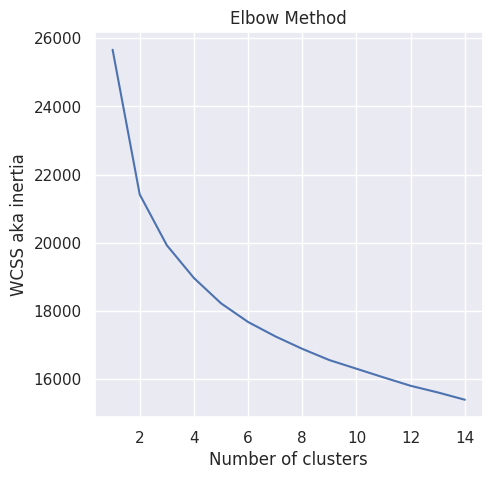

CPU times: user 1min 26s, sys: 11.6 s, total: 1min 38s
Wall time: 1min 41s


In [ ]:
# Discovering topic with cluster analysis
# Finding number of topics

%%time
# 1. import required packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 2. Create an array to capture inertia (aka within cluster sum of squares) from k-Means clustering
wcss = []
k_range = range(1, 15)

# 3. Cluster for various k
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    #kmeans.fit(tweets.TweetVectors.to_list())
    kmeans.fit(PCA_result)
    wcss.append(kmeans.inertia_)

# 4. Plot Elbow Chart
plt.plot(k_range, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS aka inertia')
plt.show()

CPU times: user 11.9 s, sys: 1.38 s, total: 13.3 s
Wall time: 12.1 s


[Text(0.5, 0, 'Tweets per Cluster'), Text(0, 0.5, 'Frequency')]

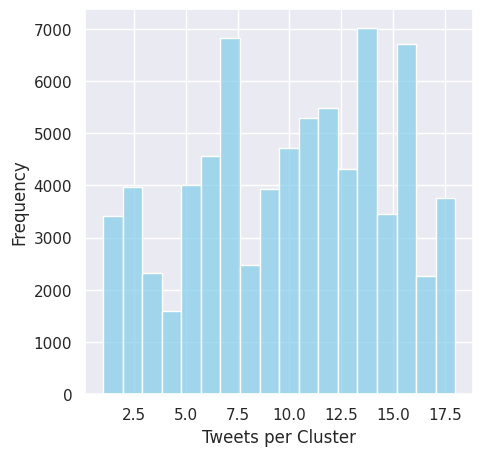

In [ ]:
# See the distribution of data in each clusters

%%time
# 1. Set k
k=18

# 2. Cluster with K-Means
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(PCA_result)+1

# 3. Add Topic to Results
reviews['Topic'] = pred_y

# 4. Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Settings for seaborn plotting style
sns.set(color_codes=True)

# 6. Settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# 7. Create Histogram
ax = sns.histplot(pred_y,
                  bins=k,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='Tweets per Cluster', ylabel='Frequency')

In [ ]:
# Exploringdiscovered topics


# 1. Import required package
# import sklearn.metrics.pairwise # we will use np.inner to get cosine similarity because SBERT's vectors are normalized. Therefore, the inner product of SBERT encodings can be treated as a similarity matrix

# 2. Initialize new Column
reviews['Relevance']=np.nan

# 3. Loop through all identified Topics to calculate centrality of each tweet in its corresponding topic
for t in range(1,reviews.Topic.max()+1):

    # a. Create topic DataFrame with tweets of topic t
    topic = reviews.loc[reviews.Topic==t, ['Topic','vectors']]
    idx = reviews.index[reviews['Topic'] == t].tolist()

    # b. Create a cosine similarity matrix (WARNING: If you have too many tweets then this matrix will get way to large for your system to handle!)
    #cos_sim = np.inner(topic.TweetVectors.to_list(),topic.TweetVectors.to_list())
    #cos_sim[np.isnan(cos_sim)] = 1
    cos_sim = np.inner(PCA_result[idx],PCA_result[idx])
    cos_sim[np.isnan(cos_sim)] = 1

    # c. Weighed Degree Centrality is the sum of a node's weighted edges = sum of cosine similarities to other vectors minus self-similarity
    topic['Relevance']=pd.Series((np.sum(cos_sim,axis=1)-1).tolist()).values.round(2)

    # d. #Re-Scale centrality from 0 to 1
    topic['Relevance']=topic['Relevance']/topic['Relevance'].max()*100

    # e. Drop Columns we don't need
    topic.drop(topic.columns[[0, 1]], axis = 1, inplace = True)

    # f. Update tweets dataframe with centrality for tweets in topic t
    reviews.update(topic)

In [ ]:
# 4. Get most central N tweets in Topic t
t=12  # topic id
N=5 # number of most central tweets

# 5. Create object for most central tweets
s = reviews[reviews.Topic==t].nlargest(N, columns=['Relevance']).text

# 6. Print most central tweets line by line
for index,text in s.items():
    print(f'{text}\n')

Not a dentist but I'm smart enough to know not to use Sensodyne.

Not a dentist, likes sensodyne.

But do dentists really recommend Sensodyne

good point about sensodyne/sensitive teeth.

Do dentists actually recommend sensodyne?



In [ ]:
%%time
# 1. Import t-SNE from scilit-learn
from sklearn.manifold import TSNE

# 2. Instantiate and Fit t-SNE
X_tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50, init='random', random_state=42).fit_transform(PCA_result)

# 3. Add X,Y Coordinates into tweets DataFrame
reviews['tSNE_X'] = np.nan
reviews['tSNE_Y'] = np.nan
reviews.update(pd.DataFrame(X_tsne, columns = ['tSNE_X','tSNE_Y'], index = reviews.index))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 76110 samples in 0.002s...
[t-SNE] Computed neighbors for 76110 samples in 47.868s...
[t-SNE] Computed conditional probabilities for sample 1000 / 76110
[t-SNE] Computed conditional probabilities for sample 2000 / 76110
[t-SNE] Computed conditional probabilities for sample 3000 / 76110
[t-SNE] Computed conditional probabilities for sample 4000 / 76110
[t-SNE] Computed conditional probabilities for sample 5000 / 76110
[t-SNE] Computed conditional probabilities for sample 6000 / 76110
[t-SNE] Computed conditional probabilities for sample 7000 / 76110
[t-SNE] Computed conditional probabilities for sample 8000 / 76110
[t-SNE] Computed conditional probabilities for sample 9000 / 76110
[t-SNE] Computed conditional probabilities for sample 10000 / 76110
[t-SNE] Computed conditional probabilities for sample 11000 / 76110
[t-SNE] Computed conditional probabilities for sample 12000 / 76110
[t-SNE] Computed conditional probabilities for sa

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76110 entries, 0 to 76109
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       76105 non-null  object 
 1   vectors    76110 non-null  object 
 2   Topic      76110 non-null  int32  
 3   Relevance  76110 non-null  float64
 4   tSNE_X     76110 non-null  float64
 5   tSNE_Y     76110 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Since altair only allows 5000 rows for the plot, I randomly select 5000 rows from the reviews data frame, and use that to get an insight on the data
import random
random.seed(1)
review_5k = reviews.sample(n=5000, random_state=42)


In [ ]:
# 1. Create a new DataFrame in which we gather all the information we need for our map
import pandas as pd
source = pd.DataFrame(
    {'x': review_5k['tSNE_X'],
     'y': review_5k['tSNE_Y'],
     'txt': review_5k["text"],
     'Topic' : review_5k['Topic'],
     'Relevance' : review_5k['Relevance']
    })

# 2. Import Altair
import altair as alt

# 3. Define Bubbles on Map
bubbles = alt.Chart(source).mark_circle().encode(
    x=alt.X('x:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.x)-10, max(source.x)+20])),
    y=alt.Y('y:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.y)-10, max(source.y)+10])),
    #size='Relevance:Q',
    color = alt.Color('Topic:N', scale=alt.Scale(scheme='tableau20')),     #  More color schemes at  https://vega.github.io/vega/docs/schemes/
    tooltip=[alt.Tooltip('txt', title='Reviews'),                            # We can include a lot of information in the tooltips (mouseover pop-up)
             alt.Tooltip('Topic', title='Topic'),
             alt.Tooltip('Relevance', title='Relevance')
            ]
)

# 4. Visualizes tweets in an interactive Map
bubbles.encode(text='txt').interactive().properties(height=700,width=700,title="Sensodyne reviews")

alt.Chart(...)

# Sentiment Analysis on overall data



In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76110 entries, 0 to 76109
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       76105 non-null  object 
 1   vectors    76110 non-null  object 
 2   Topic      76110 non-null  int32  
 3   Relevance  76110 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 2.0+ MB


In [ ]:
# 0. Run once to install the Vader Sentiment Classification Package
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
# 1. Import the sentiment module (in case you haven't already done so)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 2. Import numpy (in case you have not already done so)
import numpy as np

# 3. Instantiate the sentiment analyzer (in case you haven't already done so)
analyser = SentimentIntensityAnalyzer()

# 4. Now get the compound sentiment score for each tweet
reviews['C_Score'] = np.nan # initialize empty comlumn in our tweets dataframe (empty = missing values)
#for index, row in reviews.iterrows():  # loop through all tweets (i.e., rows)
    #reviews.loc[index, 'C_Score'] = analyser.polarity_scores(row['text'])['compound']
reviews['text'] = reviews['text'].astype(str)
reviews['C_Score'] = reviews['text'].apply(lambda x: analyser.polarity_scores(x)['compound'])

# 5. Let's take a look!
pd.set_option('display.max_colwidth', None)
reviews[['text','C_Score']][1:10]

text  \
1                                                                                      Kind of hard to gush over toothpaste, but AMAZON furnishes the availability, and the brand does what it's advertised to do. The service via AMAZON is superb, as always. Well pleased.   
2                                                                                                                                                                                                            After use this toothpaste i can eat cool food and hot food. Nice   
3                                                                                                             Running out of toothpaste? I ordered more and worried about shipping time. Came the next day with good packaging... pleased and would recommend this to others.   
4                                                                                                                                                                                     I feel fresh after using Sensodyne, I have been using it for years now. It feels clean.   
5                                                                                                                                                                                             I was having pain in upper right set of teeth, and it subsided after using this   
6                                                                                                                                                                                                                                 Fast shopping love the product great seller   
7                                                                                                                                                                                               If you have sensitive teeth this is a must have. It really works and whitens.   
8                                                                                                                                                                                                                                                 As described. Fast Shipping   
9  The best toothpaste. My husband will not use any other brand. His teeth was always sensitive and bleeds while brushing. This all stopped from using the Sensodyne toothpaste. It’s more expensive than any other brand but it is worth it when it stops teeth sensitivity.   

   C_Score  
1   0.9598  
2   0.6249  
3   0.7024  
4   0.6124  
5  -0.5106  
6   0.8519  
7   0.0000  
8   0.0000  
9   0.3818

In [ ]:
def get_emotion(score):
    if score > 0.15:
        return 1
    elif score < -0.15:
        return -1
    else:
        return 0


In [ ]:
# add new column 'emotion' based on 'C_Score'
reviews['emotion'] = reviews['C_Score'].apply(get_emotion)

reviews.head()

text  \
0  Ever since adding this toothpaste to my daily routine I've become one of my dentists favourite patients. I used to have sensitive teeth before brushing with this toothpaste regularlyWith a routine of waterfloss, brush, string floss, and then mouthwash twice daily you'll quickly become your dentists best friend   
1                                                                                                                                   Kind of hard to gush over toothpaste, but AMAZON furnishes the availability, and the brand does what it's advertised to do. The service via AMAZON is superb, as always. Well pleased.   
2                                                                                                                                                                                                                                                         After use this toothpaste i can eat cool food and hot food. Nice   
3                                                                                                                                                          Running out of toothpaste? I ordered more and worried about shipping time. Came the next day with good packaging... pleased and would recommend this to others.   
4                                                                                                                                                                                                                                  I feel fresh after using Sensodyne, I have been using it for years now. It feels clean.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             vectors  \
0                           [-0.05431518331170082, -0.09464714676141739, -0.004988620523363352, 0.04527721926569939, -0.06738536059856415, -0.0333804227411747, 0.005516636185348034, 0.1

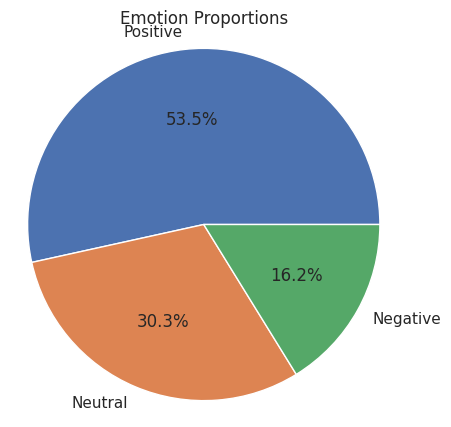

In [ ]:
emotion_counts = reviews['emotion'].value_counts()

# Plot a pie chart of the emotion counts
labels = ['Positive', 'Neutral', 'Negative']  # labels for the pie chart
plt.pie(emotion_counts, labels=labels, autopct='%1.1f%%')
plt.title('Emotion Proportions')
plt.axis('equal')
plt.show()

In [ ]:
emotion_counts

 1    40684
 0    23099
-1    12327
Name: emotion, dtype: int64

In [ ]:
positive = reviews[reviews['emotion'] == 1]
neutral = reviews[reviews['emotion'] == 0]
negative = reviews[reviews['emotion'] == -1]

In [ ]:
negative.head(1)

text  \
5  I was having pain in upper right set of teeth, and it subsided after using this   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 vectors  \
5  [-0.035921864211559296, -0.0111819077283144, 0.025128955021500587, 0.06324905902147293, -0.05664186552166939, -0.07514701783657074, -0.0754435807466507, 0.15016120672225952, -0.055648963898420334, -0.08188126236200333, 0.03516273945569992, 0.07776836305856705, 0.02067013829946518, 0.06056443229317665, -0.005011371802538633, 0.03151766583323479, 0.05469212308526039, -0.00906308088451624, 0.010190391913056374, -0.04609766975045204, -0.05407382547855377, 0.002231862163171172, -0.06136073172092438, 0.011901847086846828, -0.034979693591594696, 0.05056919902563095, -0.07794319838285446, 0.033038657158613205, 0.09304735064506531, 0.042603086680173874, 0.007401366252452135, 0.03826926276087761, 0.04378674179315567, -0.09157761186361313, -0.03192293643951416, 0.06975605338811874, -0.11251327395439148, 0.014134850353002548, 0.005375509615987539, -0.01291481964290142, -0.008557179011404514, 0.03422659635543823, 0.008175459690392017, -0.0797305628657341, 0.1101970374584198, 0.04925193637609482, 0.0005973189254291356, 0.006943314801901579, 0.046535979956388474, 0.019880356267094612, 0.05294084921479225, -0.009233133867383003, -0.00272426288574934, -0.03294620290398598, -0.10872039198875427, 0.04767348989844322, -0.058316126465797424, -0.04237319156527519, 0.013299763202667236, -0.00755548570305109, -0.0611712671816349, -0.04953259602189064, -0.10582467168569565, 0.07132572680711746, -0.03975484520196915, 0.05752959102392197, 0.006181214936077595, -0.0886038988828659, 0.018466049805283546, 0.08203369379043579, -0.019412992522120476, -0.03686843439936638, 0.07624971866607666, -0.008221403695642948, 0.06519734114408493, -0.05975350737571716, 0.12510184943675995, -0.01623411662876606, -0.02380394749343

# Topic discovering on negative data
see if there is certain reason why people gives negative reviews

In [ ]:
negative.info()
#negative = negative[['text']]
negative = negative.reset_index(drop=True)
negative.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12327 entries, 5 to 76108
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       12327 non-null  object 
 1   vectors    12327 non-null  object 
 2   Topic      12327 non-null  int32  
 3   Relevance  12327 non-null  float64
 4   C_Score    12327 non-null  float64
 5   emotion    12327 non-null  int64  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 626.0+ KB


text  \
0  I was having pain in upper right set of teeth, and it subsided after using this   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 vectors  \
0  [-0.035921864211559296, -0.0111819077283144, 0.025128955021500587, 0.06324905902147293, -0.05664186552166939, -0.07514701783657074, -0.0754435807466507, 0.15016120672225952, -0.055648963898420334, -0.08188126236200333, 0.03516273945569992, 0.07776836305856705, 0.02067013829946518, 0.06056443229317665, -0.005011371802538633, 0.03151766583323479, 0.05469212308526039, -0.00906308088451624, 0.010190391913056374, -0.04609766975045204, -0.05407382547855377, 0.002231862163171172, -0.06136073172092438, 0.011901847086846828, -0.034979693591594696, 0.05056919902563095, -0.07794319838285446, 0.033038657158613205, 0.09304735064506531, 0.042603086680173874, 0.007401366252452135, 0.03826926276087761, 0.04378674179315567, -0.09157761186361313, -0.03192293643951416, 0.06975605338811874, -0.11251327395439148, 0.014134850353002548, 0.005375509615987539, -0.01291481964290142, -0.008557179011404514, 0.03422659635543823, 0.008175459690392017, -0.0797305628657341, 0.1101970374584198, 0.04925193637609482, 0.0005973189254291356, 0.006943314801901579, 0.046535979956388474, 0.019880356267094612, 0.05294084921479225, -0.009233133867383003, -0.00272426288574934, -0.03294620290398598, -0.10872039198875427, 0.04767348989844322, -0.058316126465797424, -0.04237319156527519, 0.013299763202667236, -0.00755548570305109, -0.0611712671816349, -0.04953259602189064, -0.10582467168569565, 0.07132572680711746, -0.03975484520196915, 0.05752959102392197, 0.006181214936077595, -0.0886038988828659, 0.018466049805283546, 0.08203369379043579, -0.019412992522120476, -0.03686843439936638, 0.07624971866607666, -0.008221403695642948, 0.06519734114408493, -0.05975350737571716, 0.12510184943675995, -0.01623411662876606, -0.02380394749343

In [ ]:
# 1. Install SentenceTransformers (SBERT)
!pip install -U sentence-transformers

# 2. Import required libraries
from sentence_transformers import SentenceTransformer, util
import torch

# 3. Load a pre-trained SBERT model (this one is rather small and has "only" 384 dimensions)
embedder = SentenceTransformer('all-MiniLM-L6-v2')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Embedd reviews into feature vectors

# 4. Now we can easily embed them with SBERT
corpus_embeddings = embedder.encode(negative['text'], batch_size=64, show_progress_bar=True, convert_to_tensor=True)

# 5. Move embeddings from GPU to CPU
if torch.cuda.is_available()==True:
  print("Moving Embeddings from GPU to CPU\n")
  corpus_embeddings=corpus_embeddings.cpu()

Batches:   0%|          | 0/193 [00:00<?, ?it/s]

Moving Embeddings from GPU to CPU



In [ ]:
# 6. Add embeddings to DataFrame
negative['vectors'] = np.array(corpus_embeddings).tolist()

# 7. Take a look
negative.head(1)

text  \
0  I was having pain in upper right set of teeth, and it subsided after using this   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      vectors  \
0  [-0.03592189773917198, -0.011181886307895184, 0.02512902393937111, 0.06324908882379532, -0.056641921401023865, -0.07514695078134537, -0.07544352859258652, 0.15016114711761475, -0.05564897134900093, -0.08188124746084213, 0.03516273573040962, 0.07776838541030884, 0.020670142024755478, 0.06056445091962814, -0.005011371802538633, 0.0315176397562027, 0.054692089557647705, -0.009063082747161388, 0.01019044779241085, -0.04609769582748413, -0.05407383665442467, 0.0022318807896226645, -0.06136063486337662, 0.01190185360610485, -0.034979648888111115, 0.05056918412446976, -0.07794316858053207, 0.0330386720597744, 0.09304734319448471, 0.042603056877851486, 0.007401366252452135, 0.03826924040913582, 0.043786704540252686, -0.09157759696245193, -0.03192296624183655, 0.06975605338811874, -0.1125132367014885, 0.014134793542325497, 0.005375525914132595, -0.01291479729115963, -0.008557187393307686, 0.03422650322318077, 0.00817547831684351, -0.0797305628657341, 0.11019705981016159, 0.049251966178417206, 0.0005972963408567011, 0.006943285930901766, 0.04653593897819519, 0.01988031156361103, 0.052940867841243744, -0.009233159944415092, -0.0027242382057011127, -0.032946132123470306, -0.10872039198875427, 0.04767351970076561, -0.05831611528992653, -0.04237327352166176, 0.013299738988280296, -0.007555469870567322, -0.06117122620344162, -0.049532681703567505, -0.10582465678453445, 0.07132572680711746, -0.03975488245487213, 0.05752963945269585, 0.006181227508932352, -0.08860397338867188, 0.018466094508767128, 0.08203364163637161, -0.019413018599152565, -0.03686843067407608, 0.07624974101781845, -0.00822141021490097, 0.06519733369350433, -0.05975347384810448, 0.12510178983211517, -0.016234062612056732, -0.023

In [ ]:
# Reduce dimensionality with PCA

# 1. Import PCA library
from sklearn.decomposition import PCA

# 2. Instantiate PCA model for 30 dimensions
pca = PCA(n_components=30, random_state=42)

# 3. Fit the PCA model to our latent feature vectors
PCA_result = pca.fit_transform(negative.vectors.to_list())

# 4. Check new vector lenght for first vector
print(f'New latent feature vectors have {len(PCA_result[0])} dimensions')

New latent feature vectors have 30 dimensions


In [ ]:
# Outlier removal with an Isolation Forest

# 1. import required packages
from sklearn.ensemble import IsolationForest

# 2. Use PCA vectors
#tweet_embeddings = tweets.TweetVectors.tolist()
negative_embeddings = PCA_result

# 3. Set share of outliers to detect and remove
outliers_fraction = 0.1

# 4. Instantiate, fit, and predict (note that by removing the hyperparameter "contamination" the model will try to determine the number of outliers itself)
isf = IsolationForest(contamination=outliers_fraction, random_state=42, n_jobs=-1)
y_pred = np.array(isf.fit(negative_embeddings).predict(negative_embeddings))

# 5. How many outliers identified?
outliers = np.where(y_pred == -1)[0]
print(f"Number of detected outliers is {len(outliers)}")

# 6. Remove outliers
print(f"Number of records in reviews dataframe before outlier removal is {negative.shape}")
negative.drop(outliers, inplace=True) # drop from dataframe
negative.reset_index(drop=True, inplace=True) # reset index of dataframe
PCA_result = np.delete(PCA_result, outliers, axis = 0) # drop from pca results numpy 2D array
print(f"Number of records in reviews dataframe after outlier removal is {negative.shape}")

Number of detected outliers is 1233
Number of records in reviews dataframe before outlier removal is (12327, 6)
Number of records in reviews dataframe after outlier removal is (11094, 6)


In [ ]:
#negative = negative.reset_index(drop=True)

CPU times: user 1.04 s, sys: 699 ms, total: 1.74 s
Wall time: 970 ms


[Text(0.5, 0, 'negative review per Cluster'), Text(0, 0.5, 'Frequency')]

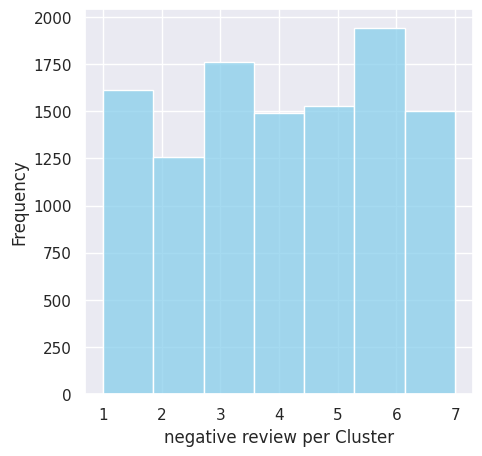

In [ ]:
%%time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Set k
k=7

# 2. Cluster with K-Means
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(PCA_result)+1

# 3. Add Topic to Results
negative['Topic'] = pred_y

# 4. Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Settings for seaborn plotting style
sns.set(color_codes=True)

# 6. Settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# 7. Create Histogram
ax = sns.histplot(pred_y,
                  bins=k,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='negative review per Cluster', ylabel='Frequency')

In [ ]:
# Exploring discovered topics


# 1. Import required package
# import sklearn.metrics.pairwise # we will use np.inner to get cosine similarity because SBERT's vectors are normalized. Therefore, the inner product of SBERT encodings can be treated as a similarity matrix

# 2. Initialize new Column
negative['Relevance']=np.nan

# 3. Loop through all identified Topics to calculate centrality of each tweet in its corresponding topic
for t in range(1,negative.Topic.max()+1):

    # a. Create topic DataFrame with tweets of topic t
    topic = negative.loc[negative.Topic==t, ['Topic','vectors']]
    idx = negative.index[negative['Topic'] == t].tolist()

    # b. Create a cosine similarity matrix (WARNING: If you have too many tweets then this matrix will get way to large for your system to handle!)
    #cos_sim = np.inner(topic.TweetVectors.to_list(),topic.TweetVectors.to_list())
    #cos_sim[np.isnan(cos_sim)] = 1
    cos_sim = np.inner(PCA_result[idx],PCA_result[idx])
    cos_sim[np.isnan(cos_sim)] = 1

    # c. Weighed Degree Centrality is the sum of a node's weighted edges = sum of cosine similarities to other vectors minus self-similarity
    topic['Relevance']=pd.Series((np.sum(cos_sim,axis=1)-1).tolist()).values.round(2)

    # d. #Re-Scale centrality from 0 to 1
    topic['Relevance']=topic['Relevance']/topic['Relevance'].max()*100

    # e. Drop Columns we don't need
    topic.drop(topic.columns[[0, 1]], axis = 1, inplace = True)

    # f. Update tweets dataframe with centrality for tweets in topic t
    negative.update(topic)

In [ ]:
# 4. Get most central N tweets in Topic t
t=3  # topic id
N=10 # number of most central tweets

# 5. Create object for most central tweets
s = negative[negative.Topic==t].nlargest(N, columns=['Relevance']).text

# 6. Print most central tweets line by line
for index,text in s.items():
    print(f'{text}\n')

Sensodyne you fool

Sensodyne you fool

Sensodyne, BITCH

fuck yeah sensodyne

Sensodyne is fucked up

Fuck sensodyne

fuck sensodyne

Oh, fuck off sensodyne.

Damn, Sensodyne

Sensodyne that shit girl



In [ ]:
%%time
# 1. Import t-SNE from scilit-learn
from sklearn.manifold import TSNE

# 2. Instantiate and Fit t-SNE
X_tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50, init='random', random_state=42).fit_transform(PCA_result)

# 3. Add X,Y Coordinates into tweets DataFrame
negative['tSNE_X'] = np.nan
negative['tSNE_Y'] = np.nan
negative.update(pd.DataFrame(X_tsne, columns = ['tSNE_X','tSNE_Y'], index = negative.index))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11094 samples in 0.001s...
[t-SNE] Computed neighbors for 11094 samples in 1.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11094
[t-SNE] Computed conditional probabilities for sample 2000 / 11094
[t-SNE] Computed conditional probabilities for sample 3000 / 11094
[t-SNE] Computed conditional probabilities for sample 4000 / 11094
[t-SNE] Computed conditional probabilities for sample 5000 / 11094
[t-SNE] Computed conditional probabilities for sample 6000 / 11094
[t-SNE] Computed conditional probabilities for sample 7000 / 11094
[t-SNE] Computed conditional probabilities for sample 8000 / 11094
[t-SNE] Computed conditional probabilities for sample 9000 / 11094
[t-SNE] Computed conditional probabilities for sample 10000 / 11094
[t-SNE] Computed conditional probabilities for sample 11000 / 11094
[t-SNE] Computed conditional probabilities for sample 11094 / 11094
[t-SNE] Mean sigma: 0.145601
[t-SNE] KL divergence

In [ ]:
import random
random.seed(1)
negative_5k = negative.sample(n=5000, random_state=42)

In [ ]:
# 1. Create a new DataFrame in which we gather all the information we need for our map
import pandas as pd
source = pd.DataFrame(
    {'x': negative_5k['tSNE_X'],
     'y': negative_5k['tSNE_Y'],
     'txt': negative_5k["text"],
     'Topic' : negative_5k['Topic'],
     'Relevance' : negative_5k['Relevance']
    })

# 2. Import Altair
import altair as alt

# 3. Define Bubbles on Map
bubbles = alt.Chart(source).mark_circle().encode(
    x=alt.X('x:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.x)-10, max(source.x)+20])),
    y=alt.Y('y:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.y)-10, max(source.y)+10])),
    #size='Relevance:Q',
    color = alt.Color('Topic:N', scale=alt.Scale(scheme='tableau20')),     #  More color schemes at  https://vega.github.io/vega/docs/schemes/
    tooltip=[alt.Tooltip('txt', title='Reviews'),                            # We can include a lot of information in the tooltips (mouseover pop-up)
             alt.Tooltip('Topic', title='Topic'),
             alt.Tooltip('Relevance', title='Relevance')
            ]
)

# 4. Visualizes tweets in an interactive Map
bubbles.encode(text='txt').interactive().properties(height=700,width=700,title="Sensodyne negative reviews")

alt.Chart(...)

# Topic discovering on positive reviews

In [ ]:
positive.info()
positive = positive.reset_index(drop=True)
positive.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40684 entries, 0 to 76109
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       40684 non-null  object 
 1   vectors    40684 non-null  object 
 2   Topic      40684 non-null  int32  
 3   Relevance  40684 non-null  float64
 4   C_Score    40684 non-null  float64
 5   emotion    40684 non-null  int64  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 2.0+ MB


text  \
0  Ever since adding this toothpaste to my daily routine I've become one of my dentists favourite patients. I used to have sensitive teeth before brushing with this toothpaste regularlyWith a routine of waterfloss, brush, string floss, and then mouthwash twice daily you'll quickly become your dentists best friend   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    vectors  \
0  [-0.05431518331170082, -0.09464714676141739, -0.004988620523363352, 0.04527721926569939, -0.06738536059856415, -0.0333804227411747, 0.005516636185348034, 0.10436178743839264, -0.07640495896339417, -0.052588675171136856, -0.05923870950937271, -0.016763173043727875, -0.012029397301375866, 0.10803444683551788, -0.03431796282529831, 0.03625842556357384, 0.022935740649700165, 0.024331137537956238, -0.006672320421785116, -0.05488087236881256, 0.03357905149459839, -0.018318917602300644, 0.0675525814294815, 0.0020712960977107286, -0.039115216583013535, 0.021113529801368713, 0.027546271681785583, -0.056618835777044296, 0.056551650166511536, 0.02005263976752758, 0.039983391761779785, 0.05455932766199112, 0.09003201127052307, -0.09888947010040283, -0.08299476653337479, 0.02104436792433262, -0.04805024340748787, 0.01220674067735672, 0.040325723588466644, -0.03828700631856918, 0.03819787874817848, -0.04479588195681572, 0.092552050948143, -0.07338541746139526, -0.0007410694961436093, -0.04168718308210373, 0.09785974770784378, -0.023820124566555023, 0.003738636616617441, 0.020120250061154366, 0.017593683674931526, -0.06308187544345856, 0.010965411551296711, -0.06852278858423233, -0.05710531398653984, 0.02162276580929756, 0.031388845294713974, 0.010377582162618637, 0.03215601667761803, 0.010585656389594078, 0.015723124146461487, -0.05044710636138916, -0.027193380519747734, 0.07569994777441025, -0.013117147609591484, 0.08299337327480316, -0.061491578817367554, 0.022191129

In [ ]:
# 1. Install SentenceTransformers (SBERT)
!pip install -U sentence-transformers

# 2. Import required libraries
from sentence_transformers import SentenceTransformer, util
import torch

# 3. Load a pre-trained SBERT model (this one is rather small and has "only" 384 dimensions)
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Embedd reviews into feature vectors

# 4. Now we can easily embed them with SBERT
corpus_embeddings = embedder.encode(positive['text'], batch_size=64, show_progress_bar=True, convert_to_tensor=True)

# 5. Move embeddings from GPU to CPU
if torch.cuda.is_available()==True:
  print("Moving Embeddings from GPU to CPU\n")
  corpus_embeddings=corpus_embeddings.cpu()

Batches:   0%|          | 0/636 [00:00<?, ?it/s]

Moving Embeddings from GPU to CPU



In [ ]:
# 6. Add embeddings to DataFrame
positive['vectors'] = np.array(corpus_embeddings).tolist()

# 7. Take a look
positive.head(1)

text  \
0  Ever since adding this toothpaste to my daily routine I've become one of my dentists favourite patients. I used to have sensitive teeth before brushing with this toothpaste regularlyWith a routine of waterfloss, brush, string floss, and then mouthwash twice daily you'll quickly become your dentists best friend   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            vectors  \
0  [-0.054315242916345596, -0.094647116959095, -0.004988618660718203, 0.045277196913957596, -0.06738530844449997, -0.03338038548827171, 0.005516603123396635, 0.10436183959245682, -0.07640503346920013, -0.052588630467653275, -0.059238776564598083, -0.016763214021921158, -0.01202937588095665, 0.10803447663784027, -0.034317974001169205, 0.03625845909118652, 0.02293574810028076, 0.02433112822473049, -0.006672327872365713, -0.054880931973457336, 0.03357900679111481, -0.01831890270113945, 0.06755252927541733, 0.002071256982162595, -0.03911520168185234, 0.021113520488142967, 0.027546286582946777, -0.056618861854076385, 0.05655166134238243, 0.02005263976752758, 0.03998337313532829, 0.05455929785966873, 0.09003196656703949, -0.09888943284749985, -0.08299475908279419, 0.021044421941041946, -0.04805024340748787, 0.01220669224858284, 0.04032565653324127, -0.038286998867988586, 0.038197871297597885, -0.04479587450623512, 0.09255201369524002, -0.07338542491197586, -0.0007410766556859016, -0.04168716073036194, 0.09785973280668259, -0.023820117115974426, 0.0037386261392384768, 0.020120229572057724, 0.017593711614608765, -0.06308183819055557, 0.010965400375425816, -0.06852281838655472, -0.05710528418421745, 0.02162283845245838, 0.031388867646455765, 0.010377599857747555, 0.03215602785348892, 0.010585637763142586, 0.015723105520009995, -0.05044707655906677, -0.027193348854780197, 0.07569994777441025, -0.013117137365043163, 0.08299334347248077, -0.06149151176214218, 0.

In [ ]:
# Reduce dimensionality with PCA

# 1. Import PCA library
from sklearn.decomposition import PCA

# 2. Instantiate PCA model for 30 dimensions
pca = PCA(n_components=30, random_state=42)

# 3. Fit the PCA model to our latent feature vectors
PCA_result = pca.fit_transform(positive.vectors.to_list())

# 4. Check new vector lenght for first vector
print(f'New latent feature vectors have {len(PCA_result[0])} dimensions')

New latent feature vectors have 30 dimensions


In [ ]:
# Outlier removal with an Isolation Forest

# 1. import required packages
from sklearn.ensemble import IsolationForest

# 2. Use PCA vectors
#tweet_embeddings = tweets.TweetVectors.tolist()
positive_embeddings = PCA_result

# 3. Set share of outliers to detect and remove
outliers_fraction = 0.1

# 4. Instantiate, fit, and predict (note that by removing the hyperparameter "contamination" the model will try to determine the number of outliers itself)
isf = IsolationForest(contamination=outliers_fraction, random_state=42, n_jobs=-1)
y_pred = np.array(isf.fit(positive_embeddings).predict(positive_embeddings))

# 5. How many outliers identified?
outliers = np.where(y_pred == -1)[0]
print(f"Number of detected outliers is {len(outliers)}")

# 6. Remove outliers
print(f"Number of records in reviews dataframe before outlier removal is {positive.shape}")
positive.drop(outliers, inplace=True) # drop from dataframe
positive.reset_index(drop=True, inplace=True) # reset index of dataframe
PCA_result = np.delete(PCA_result, outliers, axis = 0) # drop from pca results numpy 2D array
print(f"Number of records in reviews dataframe after outlier removal is {positive.shape}")

Number of detected outliers is 4069
Number of records in reviews dataframe before outlier removal is (40684, 6)
Number of records in reviews dataframe after outlier removal is (36615, 6)


CPU times: user 3.42 s, sys: 534 ms, total: 3.96 s
Wall time: 6.62 s


[Text(0.5, 0, 'positive review per Cluster'), Text(0, 0.5, 'Frequency')]

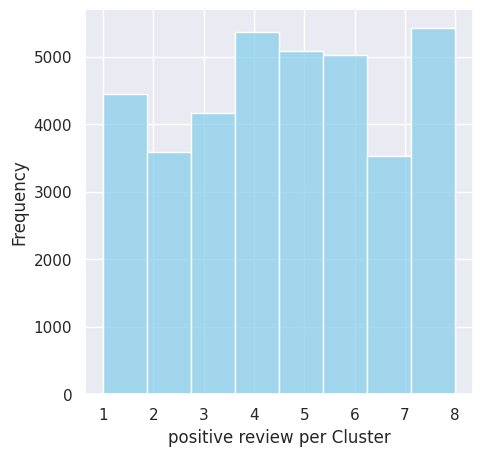

In [ ]:
%%time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Set k
k=8

# 2. Cluster with K-Means
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(PCA_result)+1

# 3. Add Topic to Results
positive['Topic'] = pred_y

# 4. Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Settings for seaborn plotting style
sns.set(color_codes=True)

# 6. Settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# 7. Create Histogram
ax = sns.histplot(pred_y,
                  bins=k,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='positive review per Cluster', ylabel='Frequency')

In [ ]:
# Exploring discovered topics


# 1. Import required package
# import sklearn.metrics.pairwise # we will use np.inner to get cosine similarity because SBERT's vectors are normalized. Therefore, the inner product of SBERT encodings can be treated as a similarity matrix

# 2. Initialize new Column
positive['Relevance']=np.nan

# 3. Loop through all identified Topics to calculate centrality of each tweet in its corresponding topic
for t in range(1,positive.Topic.max()+1):

    # a. Create topic DataFrame with tweets of topic t
    topic = positive.loc[positive.Topic==t, ['Topic','vectors']]
    idx = positive.index[positive['Topic'] == t].tolist()

    # b. Create a cosine similarity matrix (WARNING: If you have too many tweets then this matrix will get way to large for your system to handle!)
    #cos_sim = np.inner(topic.TweetVectors.to_list(),topic.TweetVectors.to_list())
    #cos_sim[np.isnan(cos_sim)] = 1
    cos_sim = np.inner(PCA_result[idx],PCA_result[idx])
    cos_sim[np.isnan(cos_sim)] = 1

    # c. Weighed Degree Centrality is the sum of a node's weighted edges = sum of cosine similarities to other vectors minus self-similarity
    topic['Relevance']=pd.Series((np.sum(cos_sim,axis=1)-1).tolist()).values.round(2)

    # d. #Re-Scale centrality from 0 to 1
    topic['Relevance']=topic['Relevance']/topic['Relevance'].max()*100

    # e. Drop Columns we don't need
    topic.drop(topic.columns[[0, 1]], axis = 1, inplace = True)

    # f. Update tweets dataframe with centrality for tweets in topic t
    positive.update(topic)

In [ ]:
# 4. Get most central N tweets in Topic t
t=4  # topic id
N=5 # number of most central tweets

# 5. Create object for most central tweets
s = positive[positive.Topic==t].nlargest(N, columns=['Relevance']).text

# 6. Print most central tweets line by line
for index,text in s.items():
    print(f'{text}\n')

What's your favorite kind of toothpaste? — Sensodyne!

The best toothpaste is sensodyne

The best ever toothpaste was Sensodyne Iso Active- the blue cap! I wish they produce it again.

The best toothpaste!! Great product,  Fantastic company!!Thx Sensodyne!!

I agree Sensodyne toothpaste is pretty awesome. Probably the only toothpaste that doesn't make me gag when I brush my teeth. I just wish it didn't cost more then the regular toothpastes rolling_on_the_floor_laughing



In [ ]:
%%time
# 1. Import t-SNE from scilit-learn
from sklearn.manifold import TSNE

# 2. Instantiate and Fit t-SNE
X_tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50, init='random', random_state=42).fit_transform(PCA_result)

# 3. Add X,Y Coordinates into tweets DataFrame
positive['tSNE_X'] = np.nan
positive['tSNE_Y'] = np.nan
positive.update(pd.DataFrame(X_tsne, columns = ['tSNE_X','tSNE_Y'], index = positive.index))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 36615 samples in 0.001s...
[t-SNE] Computed neighbors for 36615 samples in 14.845s...
[t-SNE] Computed conditional probabilities for sample 1000 / 36615
[t-SNE] Computed conditional probabilities for sample 2000 / 36615
[t-SNE] Computed conditional probabilities for sample 3000 / 36615
[t-SNE] Computed conditional probabilities for sample 4000 / 36615
[t-SNE] Computed conditional probabilities for sample 5000 / 36615
[t-SNE] Computed conditional probabilities for sample 6000 / 36615
[t-SNE] Computed conditional probabilities for sample 7000 / 36615
[t-SNE] Computed conditional probabilities for sample 8000 / 36615
[t-SNE] Computed conditional probabilities for sample 9000 / 36615
[t-SNE] Computed conditional probabilities for sample 10000 / 36615
[t-SNE] Computed conditional probabilities for sample 11000 / 36615
[t-SNE] Computed conditional probabilities for sample 12000 / 36615
[t-SNE] Computed conditional probabilities for sa

In [ ]:
import random
random.seed(1)
positive_5k = positive.sample(n=5000, random_state=42)

In [ ]:
# 1. Create a new DataFrame in which we gather all the information we need for our map
import pandas as pd
source = pd.DataFrame(
    {'x': positive_5k['tSNE_X'],
     'y': positive_5k['tSNE_Y'],
     'txt': positive_5k["text"],
     'Topic' : positive_5k['Topic'],
     'Relevance' : positive_5k['Relevance']
    })

# 2. Import Altair
import altair as alt

# 3. Define Bubbles on Map
bubbles = alt.Chart(source).mark_circle().encode(
    x=alt.X('x:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.x)-10, max(source.x)+20])),
    y=alt.Y('y:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.y)-10, max(source.y)+10])),
    #size='Relevance:Q',
    color = alt.Color('Topic:N', scale=alt.Scale(scheme='tableau20')),     #  More color schemes at  https://vega.github.io/vega/docs/schemes/
    tooltip=[alt.Tooltip('txt', title='Reviews'),                            # We can include a lot of information in the tooltips (mouseover pop-up)
             alt.Tooltip('Topic', title='Topic'),
             alt.Tooltip('Relevance', title='Relevance')
            ]
)

# 4. Visualizes tweets in an interactive Map
bubbles.encode(text='txt').interactive().properties(height=700,width=700,title="Sensodyne positive reviews")

alt.Chart(...)


# Word Embedding and Categorizing data by issues

In [ ]:
# Getting the cleaned data
%cd /content/gdrive/MyDrive/488/Major Project/
twitter = pd.read_csv("twitter_cleaned")
reddit = pd.read_csv("reddit_cleaned")

print(twitter.info())
print(reddit.info())

/content/gdrive/.shortcut-targets-by-id/1tlV-iAsbuxplGoHLNgXqXKC7E8Ipgfke/Major Project
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63780 entries, 0 to 63779
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentences         63780 non-null  object 
 1   predicted_scores  63780 non-null  float64
dtypes: float64(1), object(1)
memory usage: 996.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19287 entries, 0 to 19286
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentences         19287 non-null  object 
 1   predicted_scores  19287 non-null  float64
dtypes: float64(1), object(1)
memory usage: 301.5+ KB
None


In [ ]:
# Getting the reviews from Amazon, Twitter and Reddit together and saving it in a text file
amazon_reviews = pd.DataFrame(topSellers['reviewDescription'])
twitter_reviews = pd.DataFrame(twitter['sentences'])
reddit_reviews = pd.DataFrame(reddit['sentences'])

twitter_reviews = twitter_reviews.rename(columns={'sentences':'reviewDescription'}, errors="raise")
reddit_reviews = reddit_reviews.rename(columns={'sentences':'reviewDescription'}, errors="raise")

reviews = pd.concat([amazon_reviews,twitter_reviews,reddit_reviews],ignore_index=True)

In [ ]:
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

reviews['reviewDescription'] = reviews['reviewDescription'].fillna('')
# Cleaning the reviews
def clean_reviews(text):
    # Removing non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", text)

    # Converting to lowercase
    lowercase = letters_only.lower()

    # Splitting into individual words
    words = lowercase.split()

    # Removing stop words
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]

    # Joining the words back into one string
    return " ".join(meaningful_words)

reviews['cleaned_reviews'] = reviews['reviewDescription'].apply(clean_reviews)

# Removing rows with NaN values in the cleaned_reviews column
reviews.dropna(subset=['cleaned_reviews'], inplace=True)

# Removing URLs
reviews['cleaned_reviews'] = reviews['cleaned_reviews'].replace(to_replace=r'http\S+', value='', regex=True)
reviews['cleaned_reviews'] = reviews['cleaned_reviews'].replace(to_replace=r'www\S+', value='', regex=True)

# Removing non-ASCII characters
reviews['cleaned_reviews'] = reviews['cleaned_reviews'].apply(lambda x: x.encode("ascii", "ignore").decode())

# Tokenizing the reviews
reviews['cleaned_reviews'] = reviews['cleaned_reviews'].apply(nltk.word_tokenize)

# Removing punctuation
punctuation = ['(', ')', '?', ':', ';', ',', '.', '!', '/', '"', "'"]
reviews['cleaned_reviews'] = reviews['cleaned_reviews'].apply(lambda x: [word for word in x if word not in punctuation])
reviews['cleaned_reviews'] = reviews['cleaned_reviews'].fillna('')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Train a Word2Vec model
model = Word2Vec(sentences=reviews['cleaned_reviews'], vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
#Finiding similar words
print('Problem: {}'.format(model.wv.most_similar('problem', topn=100)))
print('Sensitivity: {}'.format(model.wv.most_similar('sensitivity', topn=20)))
print('Cavity: {}'.format(model.wv.most_similar('cavity', topn=20)))
print('Taste: {}'.format(model.wv.most_similar('taste', topn=20)))
print('Whitening: {}'.format(model.wv.most_similar('whitening', topn=20)))
print('Toothache: {}'.format(model.wv.most_similar('toothache', topn=20)))

Problem: [('issue', 0.9168957471847534), ('issues', 0.8673787713050842), ('problems', 0.8570717573165894), ('suffering', 0.7814189195632935), ('completely', 0.7498245239257812), ('fixed', 0.7445976734161377), ('solve', 0.7376930713653564), ('solved', 0.722789466381073), ('experienced', 0.7189158201217651), ('symptoms', 0.7122507095336914), ('sensitivities', 0.7041584849357605), ('switching', 0.7000506520271301), ('suffer', 0.699441134929657), ('due', 0.6956982612609863), ('related', 0.6946071982383728), ('case', 0.6920017004013062), ('toothache', 0.6875077486038208), ('alleviate', 0.6820529699325562), ('experiencing', 0.6758971810340881), ('resolved', 0.6731736063957214), ('happen', 0.6687303781509399), ('dealing', 0.6683660745620728), ('toothaches', 0.6657705307006836), ('braces', 0.6576951146125793), ('discomfort', 0.6572637557983398), ('cure', 0.6556761860847473), ('suggested', 0.6511418223381042), ('seemed', 0.6499717831611633), ('caused', 0.6483830809593201), ('happens', 0.6482450

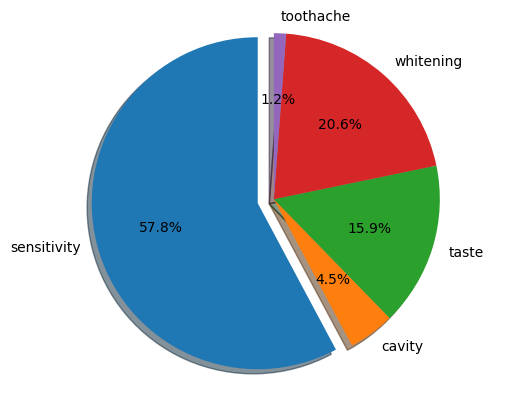

In [ ]:
#Creating vectors of similar word
sensitivity = ['sensitivity', 'sensitive', 'twinges','sensitivities']
cavity = ['cavities', 'cavity','gingivitis','plaque']
taste = ['tastes','aftertaste','taste','flavor','smell','smells','feels','texture','tasted','burn','foamy','tasting','freshener','fruity','flavour']
whitening = ['whiteregistered','whitening','whiteni','white','whiten','neutrafluor']
toothache = ['toothaches','toothache','soreness']


# Plotting the number of reviews in each category

category_shares = {'sensitivity': (reviews[reviews['reviewDescription'].str.contains('|'.join(sensitivity), case=False)].shape[0]/84567)*100, \
                   'cavity': (reviews[reviews['reviewDescription'].str.contains('|'.join(cavity), case=False)].shape[0]/84567)*100, \
                   'taste': (reviews[reviews['reviewDescription'].str.contains('|'.join(taste), case=False)].shape[0]/84567)*100, \
                   'whitening': (reviews[reviews['reviewDescription'].str.contains('|'.join(whitening), case=False)].shape[0]/84567)*100, \
                   'toothache': (reviews[reviews['reviewDescription'].str.contains('|'.join(toothache), case=False)].shape[0]/84567)*100}

# Data to plot
labels = []
sizes = []

for x, y in category_shares.items():
    labels.append(x)
    sizes.append(y)

# Plot
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, startangle=90)

plt.axis('equal')
plt.show()

In [ ]:
#Creating dataframes for each category

sensitivity_data = pd.DataFrame(reviews[reviews['reviewDescription'].str.contains('|'.join(sensitivity), case=False)])
cavity_data = pd.DataFrame(reviews[reviews['reviewDescription'].str.contains('|'.join(cavity), case=False)])
taste_data = pd.DataFrame(reviews[reviews['reviewDescription'].str.contains('|'.join(taste), case=False)])
whitening_data = pd.DataFrame(reviews[reviews['reviewDescription'].str.contains('|'.join(whitening), case=False)])
toothache_data = pd.DataFrame(reviews[reviews['reviewDescription'].str.contains('|'.join(toothache), case=False)])



In [ ]:
print(sensitivity_data.info)
print(cavity_data.shape)
print(taste_data.shape)
print(whitening_data.shape)
print(toothache_data.shape)

<bound method DataFrame.info of                                        reviewDescription  \
0      Ever since adding this toothpaste to my daily ...   
9      If you have sensitive teeth this is a must hav...   
11     The best toothpaste. My husband will not use a...   
13     72 years old, never had a cavity in my life, h...   
16     I've been using this brand for my sensitive te...   
...                                                  ...   
84553  D: What about Sensodyne that has whiteneing ju...   
84557  very good care of my teeth and I don't want to...   
84558  If it is just cold sensitivity, then it should...   
84562  Ok, this I have to reply to, just because. Col...   
84563  If this is the case, sometimes rubbing pure to...   

                                         cleaned_reviews  
0      [ever, since, adding, toothpaste, daily, routi...  
9       [sensitive, teeth, must, really, works, whitens]  
11     [best, toothpaste, husband, use, brand, teeth,...  
13     [yea

# Sentiment Analysis on each Category

In [ ]:
# Import the sentiment module (in case you haven't already done so)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import numpy (in case you have not already done so)
import numpy as np

# Instantiate the sentiment analyzer (in case you haven't already done so)
analyser = SentimentIntensityAnalyzer()

#Function to segregate scores on the emotions quotent
def get_emotion(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'



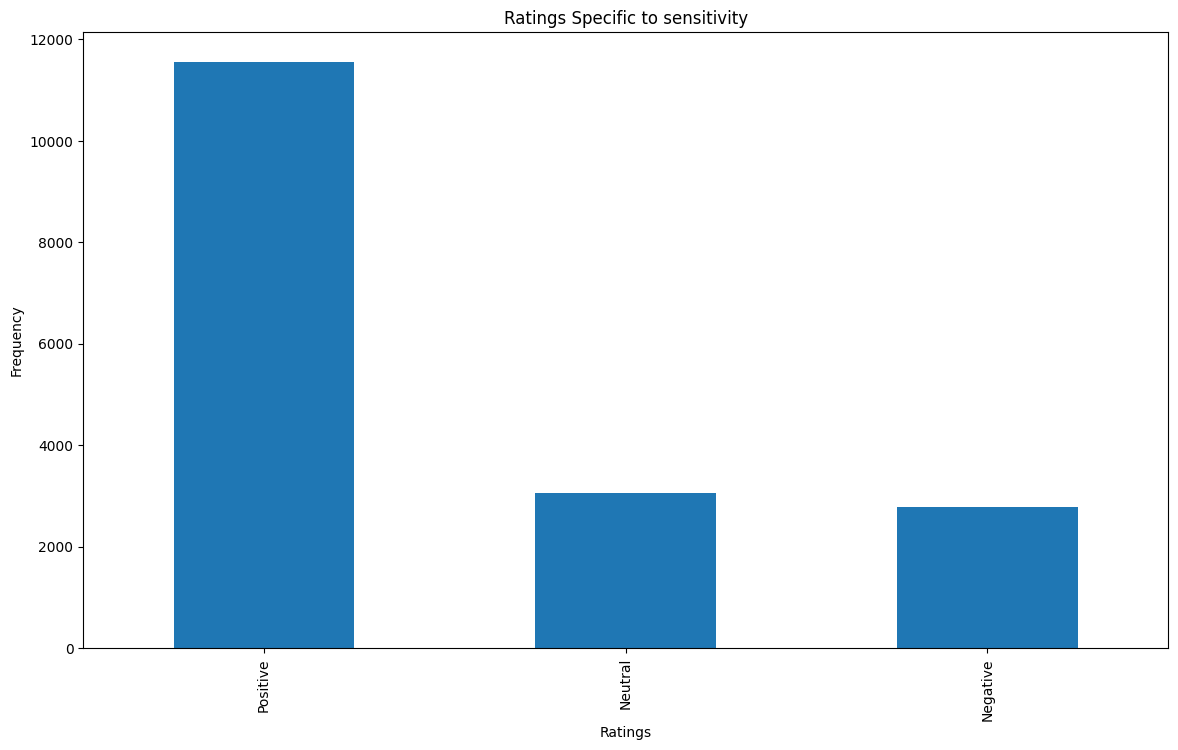

In [ ]:
# Now get the compound sentiment score for each tweet
sensitivity_data['C_Score'] = np.nan # initialize empty comlumn in our tweets dataframe (empty = missing values)
#for index, row in reviews.iterrows():  # loop through all tweets (i.e., rows)
    #reviews.loc[index, 'C_Score'] = analyser.polarity_scores(row['text'])['compound']
sensitivity_data['reviewDescription'] = sensitivity_data['reviewDescription'].astype(str)
sensitivity_data['C_Score'] = sensitivity_data['reviewDescription'].apply(lambda x: analyser.polarity_scores(x)['compound'])

# Let's take a look!
pd.set_option('display.max_colwidth', None)
sensitivity_data[['reviewDescription','C_Score']][5300:5310]

# add new column 'emotion' based on 'C_Score'
sensitivity_data['emotion'] = sensitivity_data['C_Score'].apply(get_emotion)

chart = sensitivity_data['emotion'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Ratings Specific to sensitivity")
chart.set_xlabel("Ratings")
chart.set_ylabel("Frequency")
plt.show()

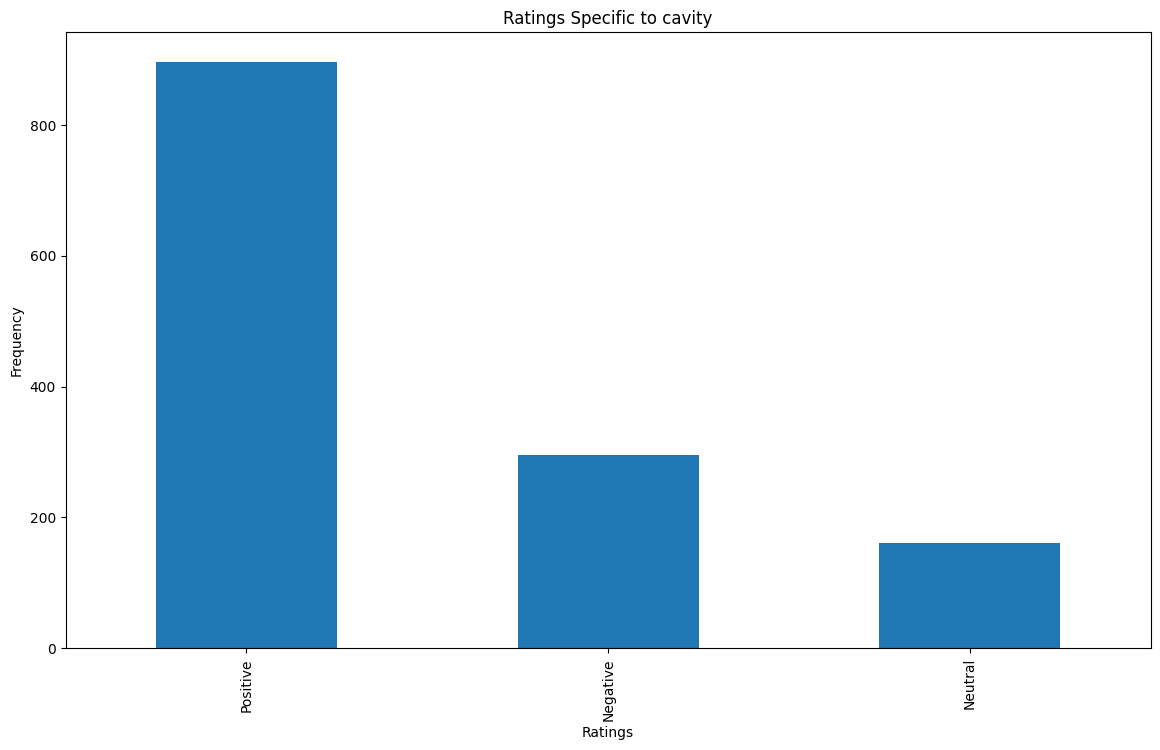

In [ ]:
# Now get the compound sentiment score for each tweet
cavity_data['C_Score'] = np.nan # initialize empty comlumn in our tweets dataframe (empty = missing values)
#for index, row in reviews.iterrows():  # loop through all tweets (i.e., rows)
    #reviews.loc[index, 'C_Score'] = analyser.polarity_scores(row['text'])['compound']
cavity_data['reviewDescription'] = cavity_data['reviewDescription'].astype(str)
cavity_data['C_Score'] = cavity_data['reviewDescription'].apply(lambda x: analyser.polarity_scores(x)['compound'])

# Let's take a look!
pd.set_option('display.max_colwidth', None)
cavity_data[['reviewDescription','C_Score']][5300:5310]

# add new column 'emotion' based on 'C_Score'
cavity_data['emotion'] = cavity_data['C_Score'].apply(get_emotion)

chart = cavity_data['emotion'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Ratings Specific to cavity")
chart.set_xlabel("Ratings")
chart.set_ylabel("Frequency")
plt.show()

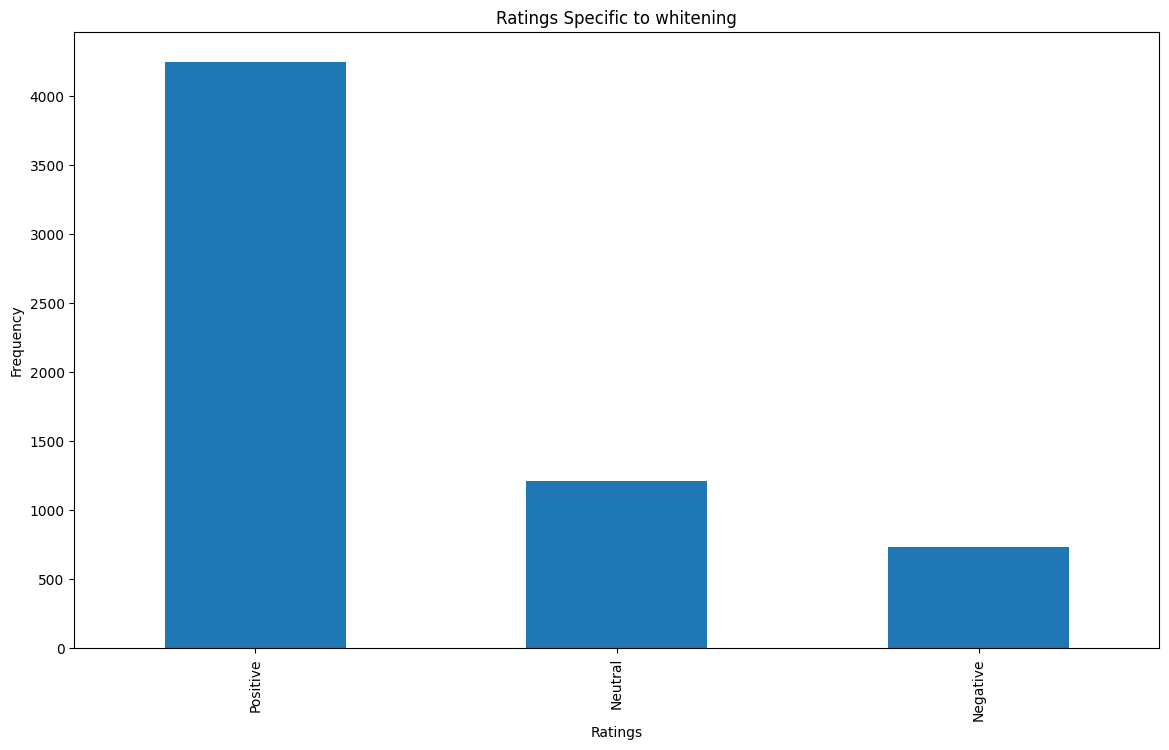

In [ ]:
# Now get the compound sentiment score for each tweet
whitening_data['C_Score'] = np.nan # initialize empty comlumn in our tweets dataframe (empty = missing values)
#for index, row in reviews.iterrows():  # loop through all tweets (i.e., rows)
    #reviews.loc[index, 'C_Score'] = analyser.polarity_scores(row['text'])['compound']
whitening_data['reviewDescription'] = whitening_data['reviewDescription'].astype(str)
whitening_data['C_Score'] = whitening_data['reviewDescription'].apply(lambda x: analyser.polarity_scores(x)['compound'])

# Let's take a look!
pd.set_option('display.max_colwidth', None)
whitening_data[['reviewDescription','C_Score']][5300:5310]

# add new column 'emotion' based on 'C_Score'
whitening_data['emotion'] = whitening_data['C_Score'].apply(get_emotion)

chart = whitening_data['emotion'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Ratings Specific to whitening")
chart.set_xlabel("Ratings")
chart.set_ylabel("Frequency")
plt.show()

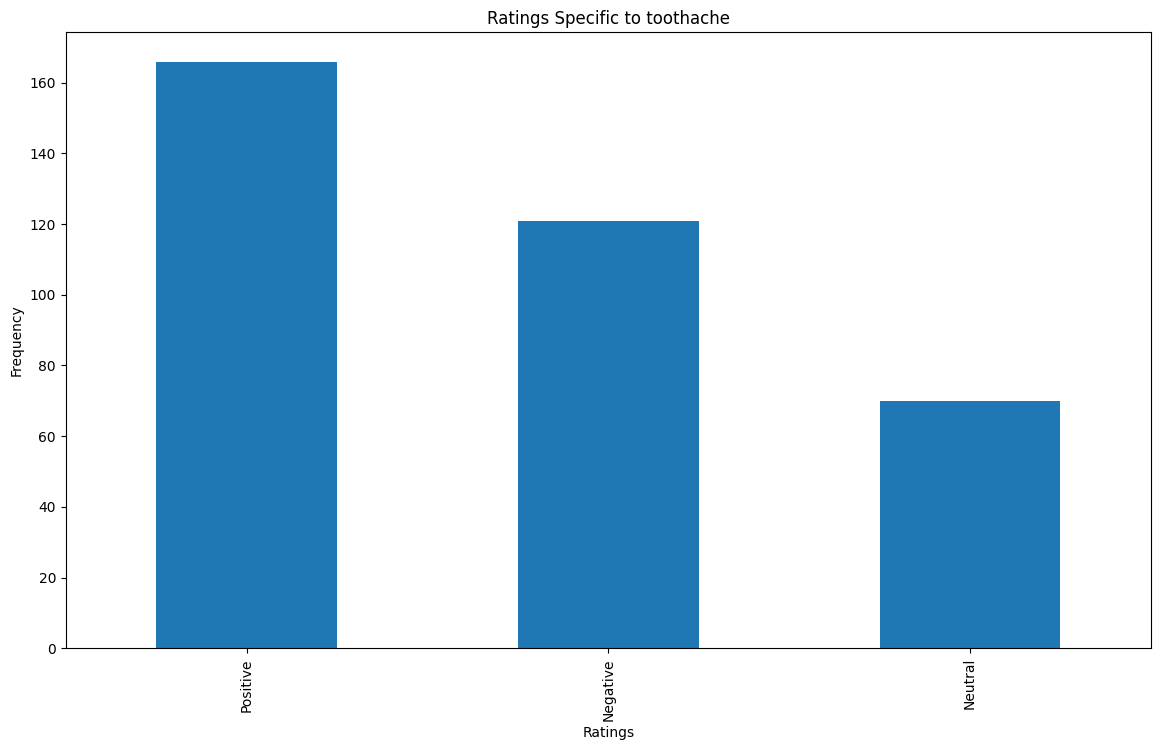

In [ ]:
# Now get the compound sentiment score for each tweet
toothache_data['C_Score'] = np.nan # initialize empty comlumn in our tweets dataframe (empty = missing values)
#for index, row in reviews.iterrows():  # loop through all tweets (i.e., rows)
    #reviews.loc[index, 'C_Score'] = analyser.polarity_scores(row['text'])['compound']
toothache_data['reviewDescription'] = toothache_data['reviewDescription'].astype(str)
toothache_data['C_Score'] = toothache_data['reviewDescription'].apply(lambda x: analyser.polarity_scores(x)['compound'])

# Let's take a look!
pd.set_option('display.max_colwidth', None)
toothache_data[['reviewDescription','C_Score']][5300:5310]

# add new column 'emotion' based on 'C_Score'
toothache_data['emotion'] = toothache_data['C_Score'].apply(get_emotion)

chart = toothache_data['emotion'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Ratings Specific to toothache")
chart.set_xlabel("Ratings")
chart.set_ylabel("Frequency")
plt.show()

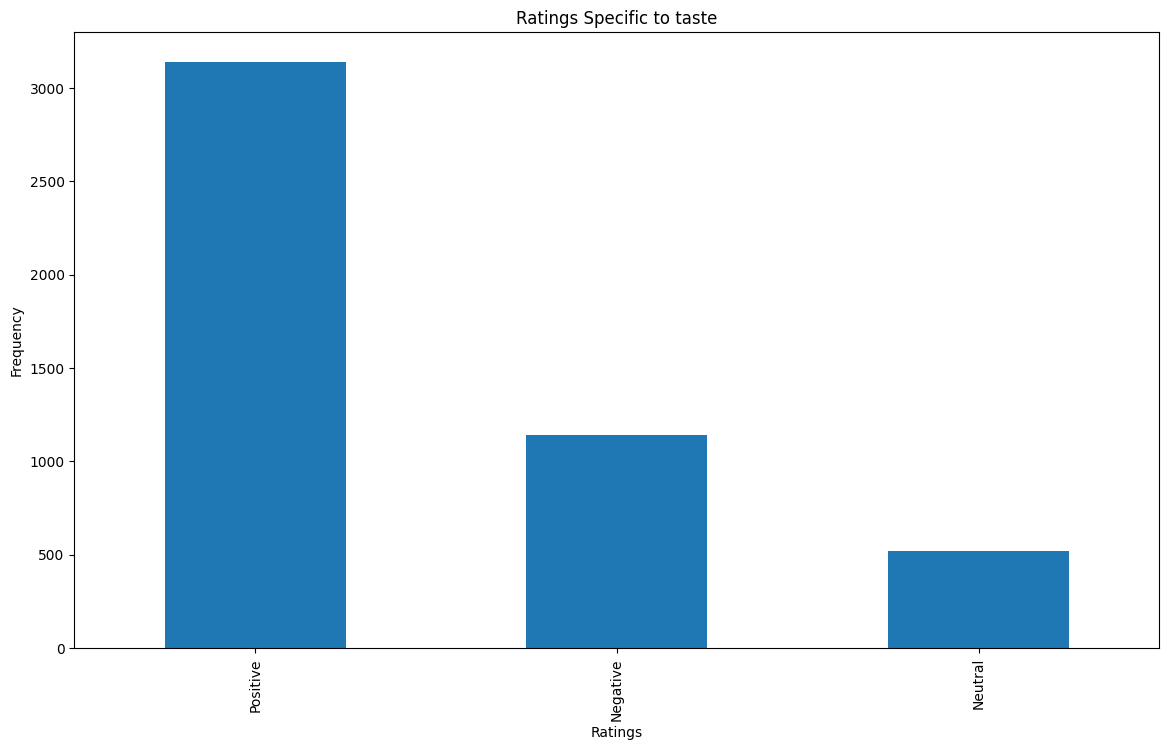

In [ ]:
# Now get the compound sentiment score for each tweet
taste_data['C_Score'] = np.nan # initialize empty comlumn in our tweets dataframe (empty = missing values)
#for index, row in reviews.iterrows():  # loop through all tweets (i.e., rows)
    #reviews.loc[index, 'C_Score'] = analyser.polarity_scores(row['text'])['compound']
taste_data['reviewDescription'] = taste_data['reviewDescription'].astype(str)
taste_data['C_Score'] = taste_data['reviewDescription'].apply(lambda x: analyser.polarity_scores(x)['compound'])

# Let's take a look!
pd.set_option('display.max_colwidth', None)
taste_data[['reviewDescription','C_Score']][5300:5310]

# add new column 'emotion' based on 'C_Score'
taste_data['emotion'] = taste_data['C_Score'].apply(get_emotion)

chart = taste_data['emotion'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Ratings Specific to taste")
chart.set_xlabel("Ratings")
chart.set_ylabel("Frequency")
plt.show()